<a href="https://colab.research.google.com/github/praulayar/Kaggle-Competition-May-2025/blob/main/21f1003816_notebook_t22025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

engage_2_value_from_clicks_to_conversions_path = kagglehub.competition_download('engage-2-value-from-clicks-to-conversions')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


## Import Libraries/Packages and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import time
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [ ]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [ ]:
# train and test data loading

train_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
test_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

train_df.shape, test_df.shape

((116023, 52), (29006, 51))

## Preliminary Data Checkup

In [ ]:
# shape of train and test data

print(f"Train data has {train_df.shape[0]} rows and {train_df.shape[1]} columns including Target column.")
print(f"Test data has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

Train data has 116023 rows and 52 columns including Target column.
Test data has 29006 rows and 51 columns.


In [ ]:
train_df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 

In [ ]:
# train data information about columns such as data type, non-null count of value

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [ ]:
# test data information about columns such as data type, non-null count of value

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

- Train data has `116023` rows and `52` columns.
- Test data has `29006` rows and `51` columns excluding target column.

-----
- Target column is `purchaseValue` which numerical in nature. Therefore, this is a `Regression` problem.


- There are `11` columns where missing values present in the both Train and Test Data.


- Numerical columns
    - `totalHits`, `totals.visits`, `sessionNumber`, `pageViews`, `purchaseValue`

      
- Boolean columns (nature)
    - `device.isMobile`, `new_visits`, `totals.bounces`, `gclIdPresent`


- Datetime columns (nature)
    - `date`, `sessionStart`


- Categorical columns
    - `userId`, `sessionId`,
    - `userChannel`, `browser`, `os`, `browserMajor`, `screenSize`
    - `device.browserSize`, `device.browserVersion`, `deviceType`, `device.flashVersion`, `device.language`, `device.mobileDeviceBranding`,
       `device.mobileDeviceMarketingNam`, `device.mobileDeviceModel`, `device.mobileInputSelector`, `device.operatingSystemVersion`,
       `device.screenColors`,`device.screenResolution`
    - `geoNetwork.city`, `geoNetwork.continent`, `locationCountry`, `geoNetwork.metro`, `geoNetwork.networkDomain`,
       `geoNetwork.networkLocation`, `geoNetwork.region`,`geoNetwork.subContinent`, `geoCluster`, `socialEngagementType`
    - `trafficSource.adContent`, `trafficSource.adwordsClickInfo.adNetworkType`, `trafficSource.adwordsClickInfo.isVideoAd`,
       `trafficSource.adwordsClickInfo.slot`, `trafficSource.campaign`, `trafficSource.isTrueDirect`, `trafficSource.keyword`,
       `trafficSource.medium`, `trafficSource.referralPath`, `trafficSource`, `trafficSource.adwordsClickInfo.page`



## Missing values and Duplicate data

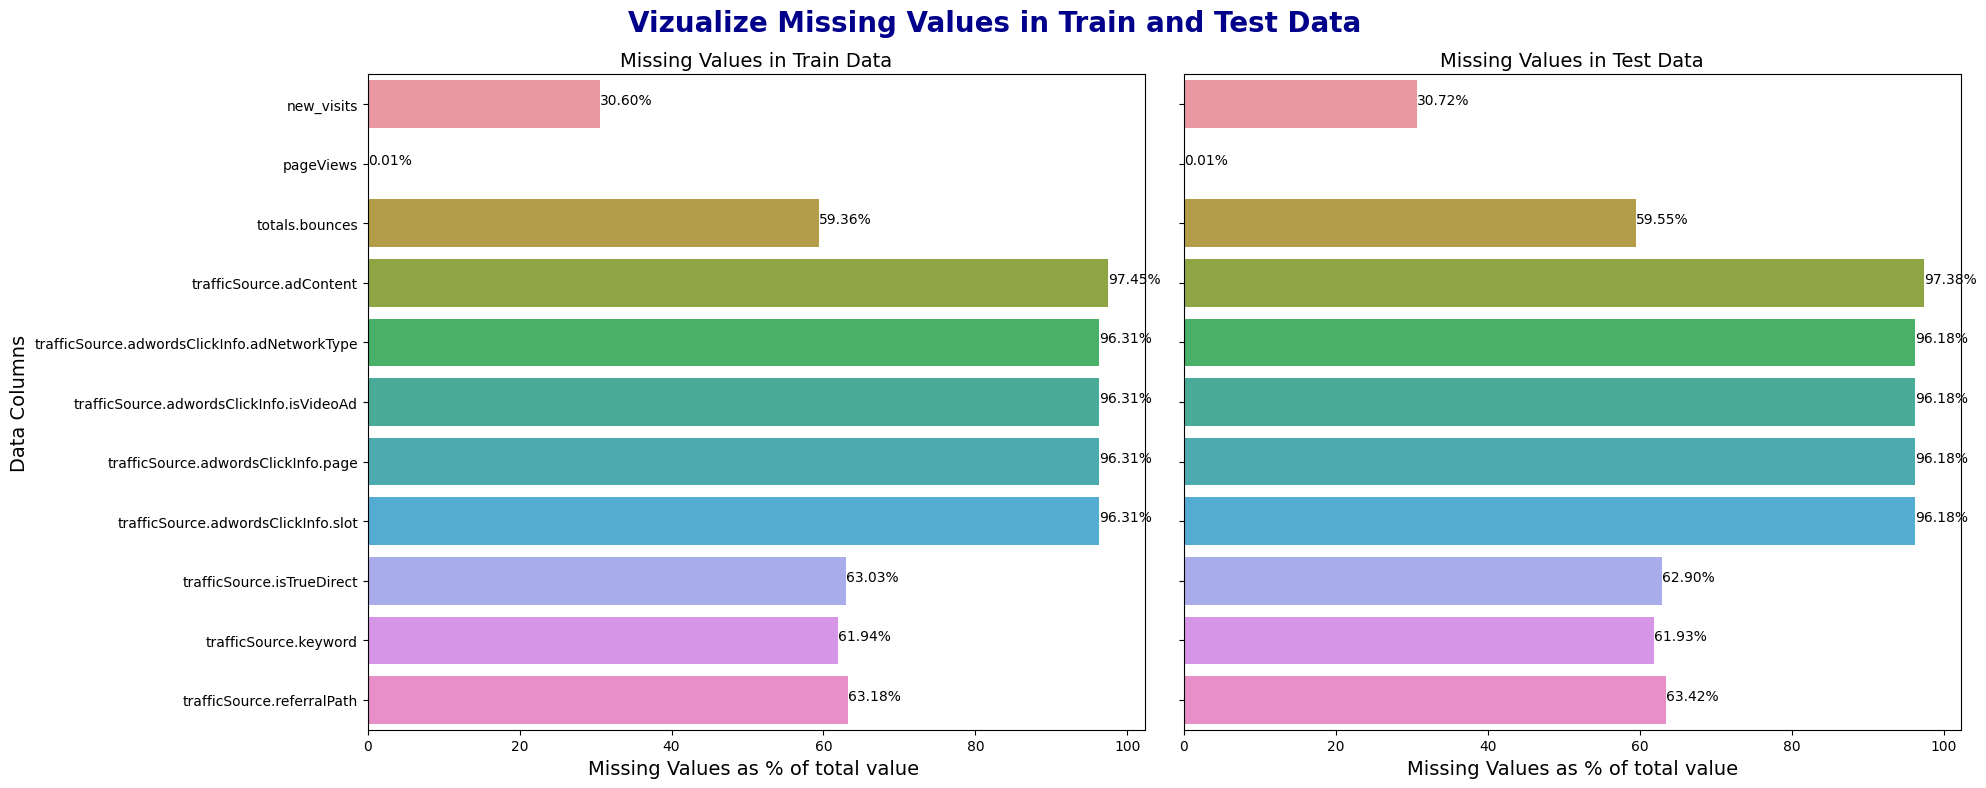

In [ ]:
train_df_cols_missing = (
        (train_df.isna().sum() / train_df.shape[0]) * 100).reset_index().rename(columns={'index': 'data_cols', 0: 'missing_val_pct'}
    ).loc[lambda _df: _df['missing_val_pct'] > 0].sort_values(['data_cols'])

test_df_cols_missing = (
        (test_df.isna().sum() / test_df.shape[0]) * 100).reset_index().rename(columns={'index': 'data_cols', 0: 'missing_val_pct'}
    ).loc[lambda _df: _df['missing_val_pct'] > 0].sort_values(['data_cols'])


fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 8))
fig.suptitle('Vizualize Missing Values in Train and Test Data', fontsize=20, fontweight='semibold', color='darkblue')

sns.barplot(data=train_df_cols_missing, y='data_cols', x='missing_val_pct', ax=axes[0])
axes[0].set_title('Missing Values in Train Data', fontsize=14, fontweight='medium')
axes[0].set_xlabel('Missing Values as % of total value ', fontsize=14, fontweight='medium')
axes[0].set_ylabel('Data Columns', fontsize=14, fontweight='medium')

sns.barplot(data=test_df_cols_missing, y='data_cols', x='missing_val_pct', ax=axes[1])
axes[1].set_title('Missing Values in Test Data', fontsize=14, fontweight='medium')
axes[1].set_xlabel('Missing Values as % of total value', fontsize=14, fontweight='medium')
axes[1].set_ylabel('')

for ax in axes:
    for bar in ax.patches:
        missing_val_pct = bar.get_width()
        ax.annotate(
            text=f'{missing_val_pct:.2f}%',
            xy=(bar.get_x()+bar.get_width(), bar.get_y()+bar.get_height()/2)
        )

plt.tight_layout()
plt.show()

- There are total 11 columns where missing values are present in both the Train and Test data.


- There are 5 columns which has more than 95% missing values present in both the Train and Test data.
    - `trafficSource.adContent`
    - `trafficSource.adwordsClickInfo.slot`
    - `trafficSource.adwordsClickInfo.isVideoAd`
    - `trafficSource.adwordsClickInfo.adNetworkType`
    - `trafficSource.adwordsClickInfo.page`


- There are 4 columns which has around 60% of missing values present in both the Train and Test data.
    - `totals.bounces`
    - `trafficSource.keyword`
    - `trafficSource.isTrueDirect`
    - `trafficSource.referralPath`

- Other two columns
    - `pageViews` around 30% missing values
    - `new_visits` around 0.01% missing value



In [ ]:
# naive check for duplicate value in the dataset

print(f'Train data has total {train_df.duplicated().sum()} duplicate rows.')
print(f'Test data has total {test_df.duplicated().sum()} duplicate rows')

Train data has total 236 duplicate rows.
Test data has total 16 duplicate rows


In [ ]:
# check for duplicate value based on certain subset of columns which could identify unique session based on date, sessionStart, new_visit

subset_cols = ['userId', 'sessionId', 'sessionNumber', 'sessionStart', 'date']

print(f'Train data has total {train_df.duplicated(subset=subset_cols).sum()} duplicate rows if consider subset columns for checking of duplicate rows.')
print(f'Test data has total {test_df.duplicated(subset=subset_cols).sum()} duplicate rows if consider subset columns for checking of duplicate rows.')

Train data has total 8485 duplicate rows if consider subset columns for checking of duplicate rows.
Test data has total 529 duplicate rows if consider subset columns for checking of duplicate rows.


- There are a total of `236` duplicate rows in the Train data based on naive duplicate check
- There are a total of `16` duplicate rows in the Test data based on naive duplicate check
  
----
- The dataset is about `multi-session digital behavior` of users, both `with or without purchases`
- Upon closer inspection of the training data, it appears that duplicate rows may exist based on a subset of columns that can identify unique multiple sessions per use
  - `userId`, `sessionId`, `sessionStart`, `date`, `new_visits`
- There are a total of `8485` duplicate rows in the Train data, which accounts for approximately `7.31%` of the total rows in the training data.
- There are a total of `529` duplicate rows in the Test data, which accounts for approximately `1.82%` of the total rows in the training data.
  
---
- Implication of duplicate data
  - skewed statistcal analysis, misleading charts or graphs
  - model memorize same data points, reduce generalization of model or lead to overfit on the training data

## Exploratory Data Analysis

#### drop duplicate rows

In [ ]:
subset = ['userId', 'sessionId', 'sessionNumber', 'sessionStart', 'date', 'new_visits']

# drop duplicate rows based on the subset of columns in the train data for EDA
train_df_copy = train_df.drop_duplicates(subset=subset).copy(deep=True)


print(f'After dropping some rows based on some subset of columns, we have about {train_df_copy.shape[0]} rows in the training dataset')
train_df_copy.shape

After dropping some rows based on some subset of columns, we have about 107538 rows in the training dataset


(107538, 52)

#### datetime information extract

In [ ]:
# datetime column
train_df_copy['date'] = pd.to_datetime(train_df_copy['date'], format='%Y%m%d')
train_df_copy['sessionStart'] = pd.to_datetime(train_df_copy['sessionStart'], unit='s')

# extract columns from sessionTime
train_df_copy['year'] = train_df_copy['sessionStart'].dt.year
train_df_copy['month'] = train_df_copy['sessionStart'].dt.month
train_df_copy['day'] = train_df_copy['sessionStart'].dt.day
train_df_copy['hour'] = train_df_copy['sessionStart'].dt.hour
train_df_copy['day_of_week'] = train_df_copy['sessionStart'].dt.dayofweek

# month
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# day of week
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


# time category of a day
time_bins = [0, 4, 8, 12, 16, 20, 24]
time_labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# new column time_category
train_df_copy['time_category'] = pd.cut(train_df_copy['hour'], bins=time_bins, labels=time_labels, right=False)

#### fill missing values

In [ ]:
# pageView col
train_df_copy.loc[train_df_copy['pageViews'].isna(), 'pageViews'] = 1


# totals.bounces col
train_df_copy.loc[(train_df_copy['totals.bounces'].isna()) & (train_df_copy['pageViews'].eq(1)) , 'totals.bounces'] = 1
train_df_copy.loc[(train_df_copy['totals.bounces'].isna()) & (~train_df_copy['pageViews'].eq(1)) , 'totals.bounces'] = 0

# new_visists col
train_df_copy.loc[train_df_copy['new_visits'].isna(), 'new_visits'] = 0


train_df_copy.loc[lambda _df: ~_df['os'].isin(_df['os'].value_counts().head().index), 'os'] = 'Other'
train_df_copy.loc[lambda _df: ~_df['browser'].isin(_df['browser'].value_counts().head(3).index), 'browser'] = 'Other'

#### binning for some columns

In [ ]:
# bin sessionNumber col
session_num_bins = [0, 1, 2, 3, 4, 5, 10, float('inf')]
session_num_labels = [1, 2, 3, 4, 5, '6-10', '10+']

train_df_copy['session_num_cat'] = pd.cut(train_df_copy['sessionNumber'], bins=session_num_bins, labels=session_num_labels, right=True, include_lowest=True)


# bin totalHits col
total_hits_bins = [0, 1, 2, 3, 5, 10, 20, 40, 70, 100, float('inf')]
total_hits_labels = ['1', '2', '3', '4–5', '6–10', '11–20', '21-40', '41–70', '71-100', '100+']

train_df_copy['total_hits_cat'] = pd.cut(train_df_copy['totalHits'], bins=total_hits_bins, labels=total_hits_labels, right=True, include_lowest=True)

# bin pageViews col
page_views_bins = [0, 1, 2, 3, 5, 10, 20, 40, 70, 100, float('inf')]
page_views_labels = ['1', '2', '3', '4–5', '6–10', '11–20', '21-40', '41–70', '71-100', '100+']

train_df_copy['page_views_cat'] = pd.cut(train_df_copy['pageViews'], bins=page_views_bins, labels=page_views_labels, right=True, include_lowest=True)

#### Extract sources from trafficSource

In [ ]:
sources = [r'direct', r'youtube', r'facebook', r'yahoo', r'bing', r'partners', 'Google','Google-Eco']

train_df_copy.loc[lambda _df: _df['trafficSource'].str.fullmatch(r'google', case=False), 'trafficSource'] = 'Google'
train_df_copy.loc[lambda _df: _df['trafficSource'].str.contains(r'google'), 'trafficSource'] = 'Google-Eco'

for source in sources[:-2]:
    train_df_copy.loc[lambda _df: _df['trafficSource'].str.contains(source), 'trafficSource'] = str(source).title()

train_df_copy.loc[lambda _df: ~(_df['trafficSource'].isin(list([str(s).title() for s in sources]))), 'trafficSource'] = 'Other'

#### userId

In [ ]:
print(f"There are total {train_df_copy['userId'].nunique()} unique users.")

There are total 100499 unique users.


#### sessionId

In [ ]:
print(f"There are total {train_df_copy['sessionId'].nunique()} unique session id.")

There are total 107379 unique session id.


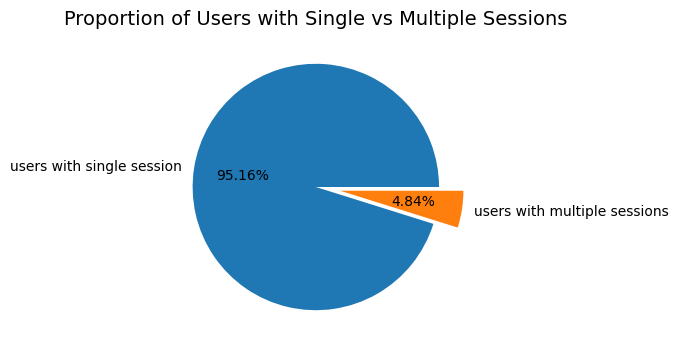

In [ ]:
users_sessions = train_df_copy.groupby(['userId'])['sessionId'].agg([('no_of_sessions', 'count')])

users_sessions_count_pct = users_sessions['no_of_sessions'].gt(1).value_counts(normalize=True).mul(100)

plt.figure(figsize=(6, 4))

plt.pie(
    x=users_sessions_count_pct,
    autopct='%0.2f%%',
    labels=['users with single session', 'users with multiple sessions'],
    explode=(0, 0.2)
)
plt.title('Proportion of Users with Single vs Multiple Sessions' , fontsize=14)
plt.show()

- There are approximately **95%** of users which only had single session and where as almost **5%** users had multiple sessions.

## Numerical Columns

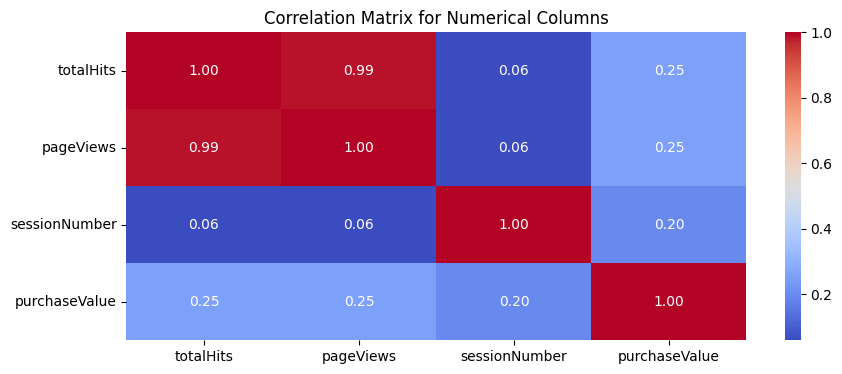

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(
    data= train_df_copy[['totalHits', 'pageViews', 'sessionNumber', 'purchaseValue']].corr(),
    annot=True, fmt='.2f', cmap='coolwarm'
)
plt.title('Correlation Matrix for Numerical Columns')

plt.show()

- columns `totalHits` and `sessionNumber` are highly correlated features, with a correlation coefficient of **0.99**.

In [ ]:
# statistical summary of actual numerical columns

train_df_copy[['totalHits', 'pageViews', 'sessionNumber', 'purchaseValue']].describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.95, 0.99])

,totalHits,pageViews,sessionNumber,purchaseValue
count,107538.000000,107538.000000,107538.000000,1.075380e+05
mean,8.921572,7.104149,2.593074,1.954632e+07
std,17.456519,12.682238,10.241380,1.736772e+08
min,1.000000,1.000000,1.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000e+00
50%,2.000000,2.000000,1.000000,0.000000e+00
75%,9.000000,7.000000,2.000000,0.000000e+00
85%,18.000000,15.000000,3.000000,7.960000e+06
95%,40.150000,31.000000,7.000000,7.968200e+07
99%,80.000000,57.000000,24.000000,3.838000e+08


#### purchaseValue (Target Column)

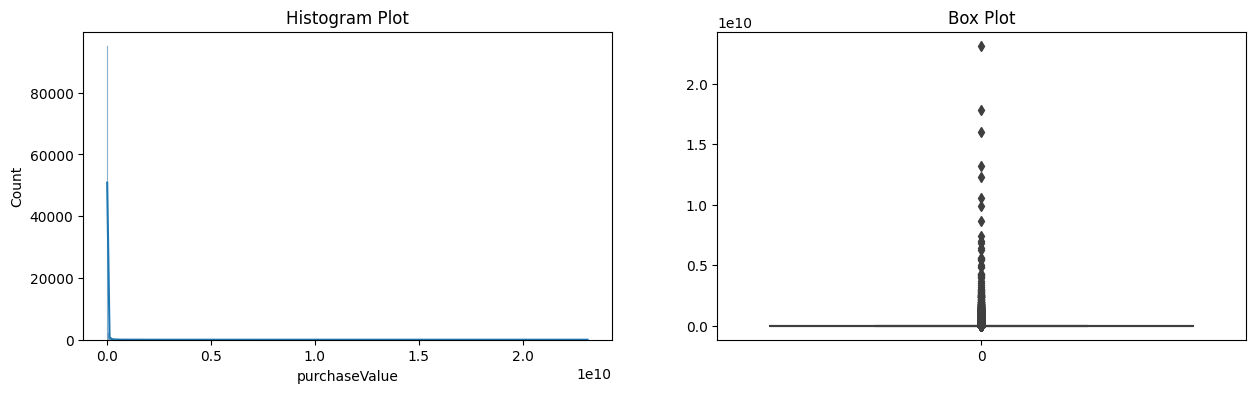

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(train_df_copy['purchaseValue'], bins=1000, kde=True, ax=ax1)
ax1.set_title('Histogram Plot')

sns.boxplot(train_df_copy['purchaseValue'], ax=ax2)
ax2.set_title('Box Plot')
plt.show()

- The target column represents purchase behavior, where most values are 0 (no purchase) and the rest are high-value purchases.
- Although the target distribution appears to have extreme values (outliers), these are not true outliers in a business sense — they represent legitimate high-value transactions.
- Therefore, treating them as statistical outliers (e.g., removing or capping) may result in loss of valuable signal, especially for revenue prediction tasks.

In [ ]:
# skewness

train_df_copy['purchaseValue'].skew()

59.25930013082661

In [ ]:
# excess kurtosis

train_df_copy['purchaseValue'].kurt()

5652.754820110458

- Visualizing the target column reveals significant skewness and kurtosis.
- The target variable is highly positively skewed. It has a skewness of approximately 60, which is far beyond the acceptable range.
- Generally, we prefer skewness in the range [-0.5, +0.5] because for regression task some model such as `LinearRegression` assume symmetry or normality in residuals (`Homoscedasticity`).
- The excess kurtosis is around **5672**, indicating very **heavy tails**, meaning a large number of outliers are present.
- Linear models are particularly sensitive to outliers, which can significantly affect their performance.

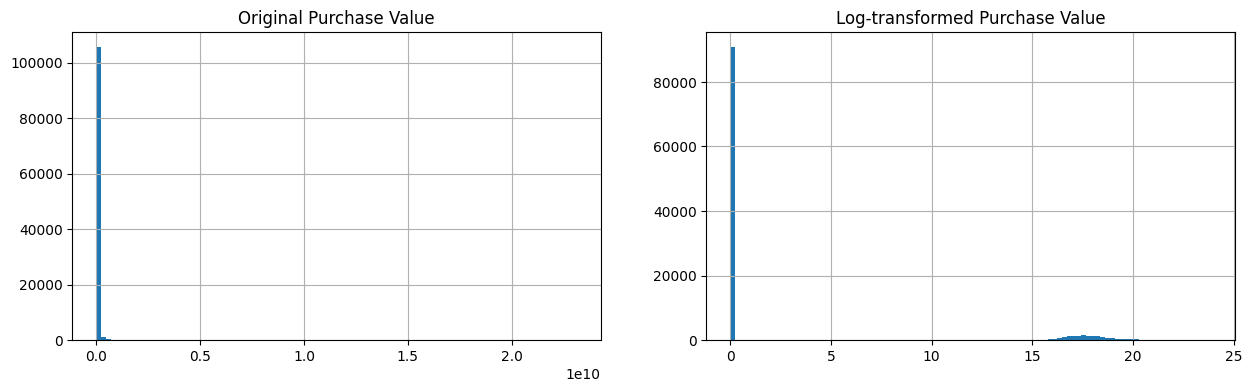

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

train_df_copy['purchaseValue'].hist(bins=100, ax=ax1)
ax1.set_title('Original Purchase Value')

np.log1p(train_df_copy['purchaseValue']).hist(bins=100, ax=ax2)
ax2.set_title('Log-transformed Purchase Value')
plt.show()

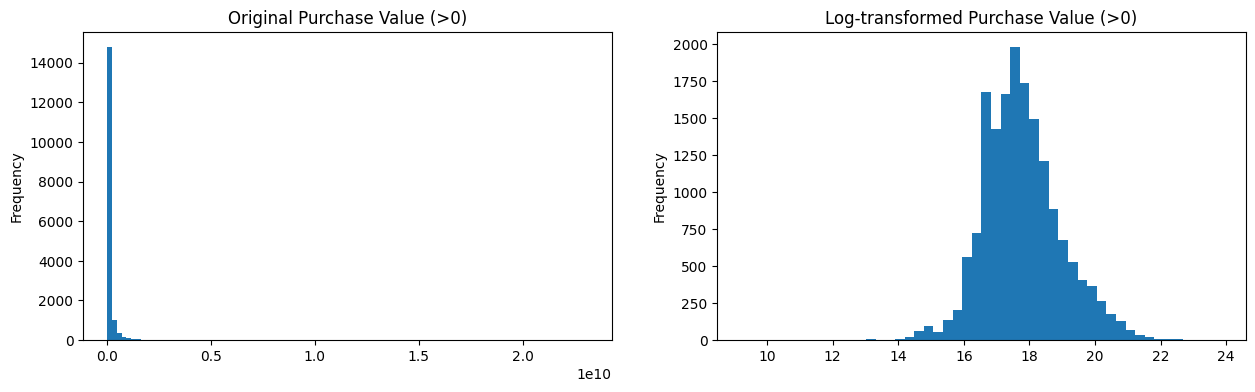

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 4))
train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue'].plot(kind='hist', bins=100, ax=ax1)
ax1.set_title('Original Purchase Value (>0)')

np.log1p(train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue']).plot(kind='hist', bins=50, ax=ax2)
ax2.set_title('Log-transformed Purchase Value (>0)')
plt.show()

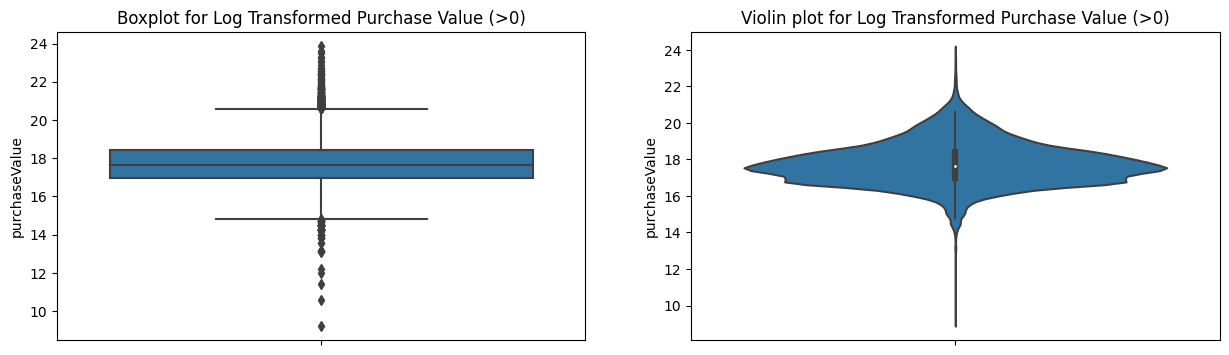

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(y=np.log1p(train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue']), ax=ax1)
ax1.set_title("Boxplot for Log Transformed Purchase Value (>0)")

sns.violinplot(y=np.log1p(train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue']), ax=ax2)
ax2.set_title("Violin plot for Log Transformed Purchase Value (>0)")

plt.show()

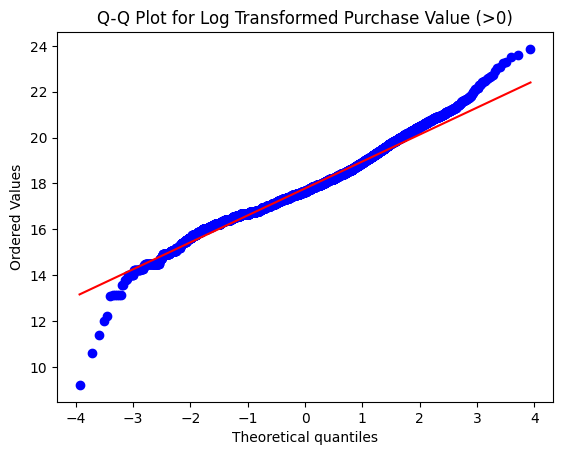

In [ ]:
stats.probplot(x=np.log1p(train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue']), dist="norm", plot=plt)
plt.title("Q-Q Plot for Log Transformed Purchase Value (>0)")
plt.show()

In [ ]:
# skewness

np.log1p(train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue']).skew()

0.3783985401267468

In [ ]:
# excess kurtosis

np.log1p(train_df_copy.loc[train_df_copy['purchaseValue']>0, 'purchaseValue']).kurt()

1.106290083313307

- The target column (purchaseValue), when considering only non-zero purchases, is highly positively skewed and exhibits high excess kurtosis.
  
- Both boxplot and violin plot of the **log-transformed purchase values** reveal a large number of extreme values, indicating heavy tails even after transformation.

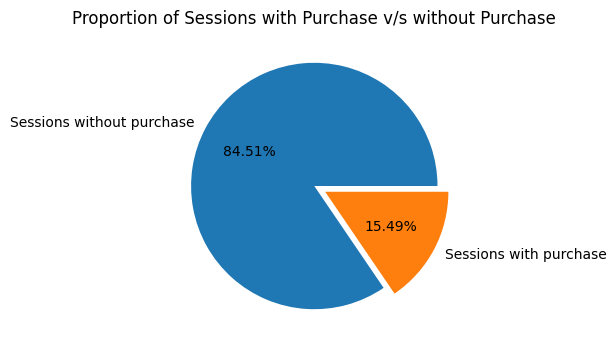

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(
    x=train_df_copy['purchaseValue'].gt(0).value_counts(normalize=True).mul(100),
    autopct='%.2f%%',
    labels=('Sessions without purchase', 'Sessions with purchase'),
    explode=(0.0, 0.1)
)
plt.title('Proportion of Sessions with Purchase v/s without Purchase')
plt.show()

- About **84%** of sessions did not result in a purchase.

- The remaining **16%** of sessions resulted in a purchase.

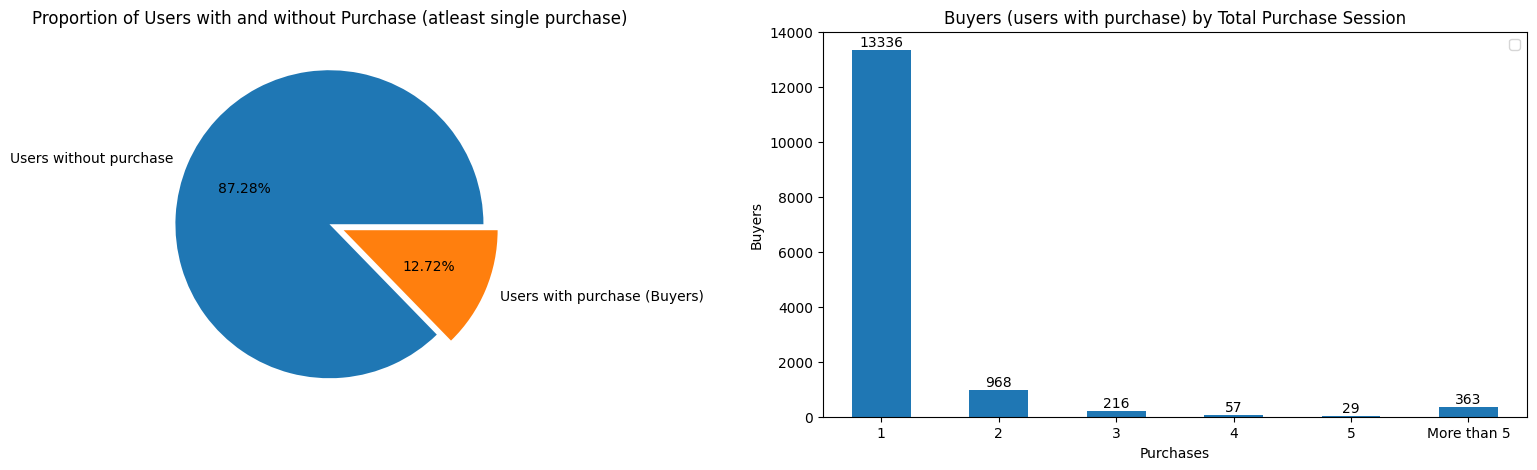

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.pie(
    x=[train_df_copy['userId'].nunique(), train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'userId'].nunique()],
    autopct='%.2f%%',
    explode=(0.0, 0.1),
    labels=('Users without purchase', 'Users with purchase (Buyers)'),
)

ax1.set_title('Proportion of Users with and without Purchase (atleast single purchase)')


buyers_purchases = (
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0]
    .groupby(['userId'])['purchaseValue']
    .count()
    .reset_index(name='total_purchases')
)

pd.concat([
    buyers_purchases.loc[buyers_purchases['total_purchases'].lt(6), 'total_purchases'].value_counts(),
    pd.Series([buyers_purchases.loc[buyers_purchases['total_purchases'].gt(5), 'total_purchases'].sum()], index=['5+'])
]).plot(kind='bar', ax=ax2)

ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(['1', '2', '3', '4', '5', 'More than 5'], rotation=0)
ax2.set_title('Buyers (users with purchase) by Total Purchase Session')
ax2.set_xlabel('Purchases')
ax2.set_ylabel('Buyers')

for bar in ax2.patches:
    height = bar.get_height()
    ax2.annotate(
        text=f'{int(height)}',
        xy=(bar.get_x()+bar.get_width()/2, height),
        xytext=(0.0, 0.3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )


plt.legend()
plt.show()

- Only **12%** of users have made at least one purchase.

- Among these buyers, the number of users with **only a single purchase** is significantly higher than those with multiple purchases.

- This pattern aligns with the **Pareto principle (80/20 rule)**, where a small fraction of users generates the majority of the **revenue/purchase**.

#### totals.bounces

In [ ]:
train_df_copy['totals.bounces'].value_counts(normalize=True).mul(100)

totals.bounces
0.0    56.486079
1.0    43.513921
Name: proportion, dtype: float64

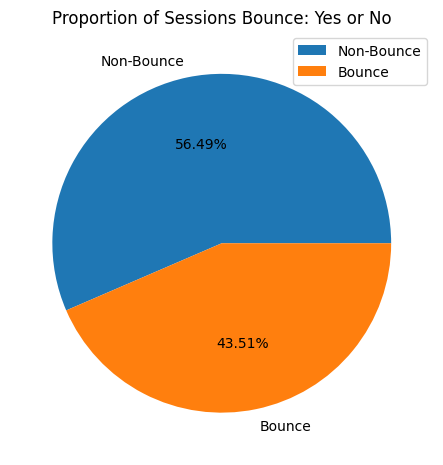

In [ ]:
plt.figure(figsize=(15, 5.5))
ax = train_df_copy['totals.bounces'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%', labels=['Non-Bounce', 'Bounce'])
ax.set_ylabel('')
ax.set_title('Proportion of Sessions Bounce: Yes or No')
plt.legend()
plt.show()

- About **43% of sessions are bounce sessions**, which means users left after viewing only one page. These sessions do not contribute to purchases.

- On the other hand, the remaining **57% non-bounce sessions** have the potential to convert into purchases.

- However, despite this potential, **a large portion of non-bounce sessions still do not result in a purchase**, as **only 16% of all sessions are purchase sessions**.

#### new_visits

In [ ]:
train_df_copy['new_visits'].value_counts(normalize=True).mul(100)

new_visits
1.0    71.419405
0.0    28.580595
Name: proportion, dtype: float64

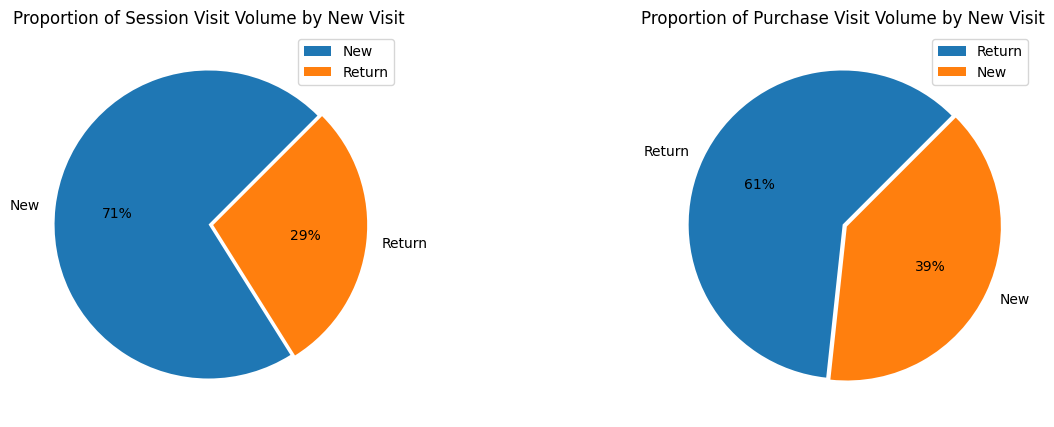

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

(
    train_df_copy['new_visits']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name='proportion')
    .plot(kind='pie', y='proportion', autopct='%2.f%%', labels=['New', 'Return'], explode=(0.0, 0.03), startangle=45, ax=ax1)
)

ax1.set_title('Proportion of Session Visit Volume by New Visit')
ax1.set_ylabel('')


(
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0, ['new_visits']]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name='proportion')
    .plot(kind='pie', y='proportion', autopct='%2.f%%', labels=['Return', 'New'], explode=(0.0, 0.03), startangle=45, ax=ax2)
)
ax2.set_title('Proportion of Purchase Visit Volume by New Visit')
ax2.set_ylabel('')

plt.show()

- **New visits account for 71%** of all sessions, but they contribute to **only 39% of purchase sessions**.

- In contrast, **returning visits make up just 29%** of total sessions, yet they contribute the **majority of purchase sessions/ purchase volume**.

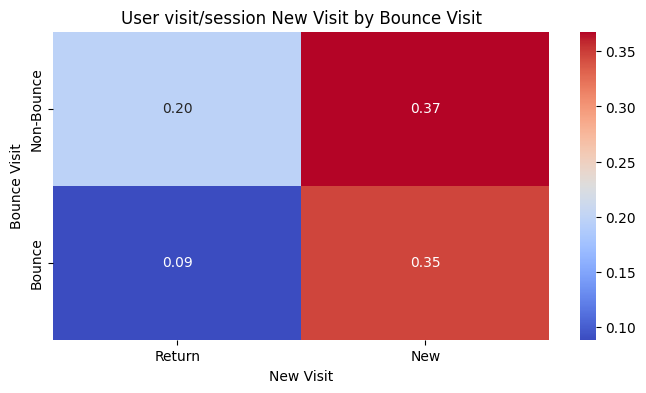

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.heatmap(
    data= pd.crosstab(train_df_copy['totals.bounces'], train_df_copy['new_visits'], normalize='all'),
    annot=True, fmt='.2f', cmap='coolwarm'
)
ax.set_title('User visit/session New Visit by Bounce Visit')
ax.set_xlabel('New Visit')
ax.set_xticks(ax.get_xticks(), labels=['Return', 'New'])

ax.set_ylabel('Bounce Visit')
ax.set_yticks(ax.get_yticks(), labels=['Non-Bounce', 'Bounce'])

plt.show()

- Approximately **37% of sessions** are from **new users with non-bounce behavior**, indicating meaningful first-time engagement.

- Around **35% of sessions** are from **new users who bounced**, which is **only slightly lower** than the non-bounce share, suggesting limited initial retention.

- **About 9% of sessions from returning users result in a bounce**, indicating that **returning visitors are more likely to stay engaged**, but some still drop off early.

#### totalHits

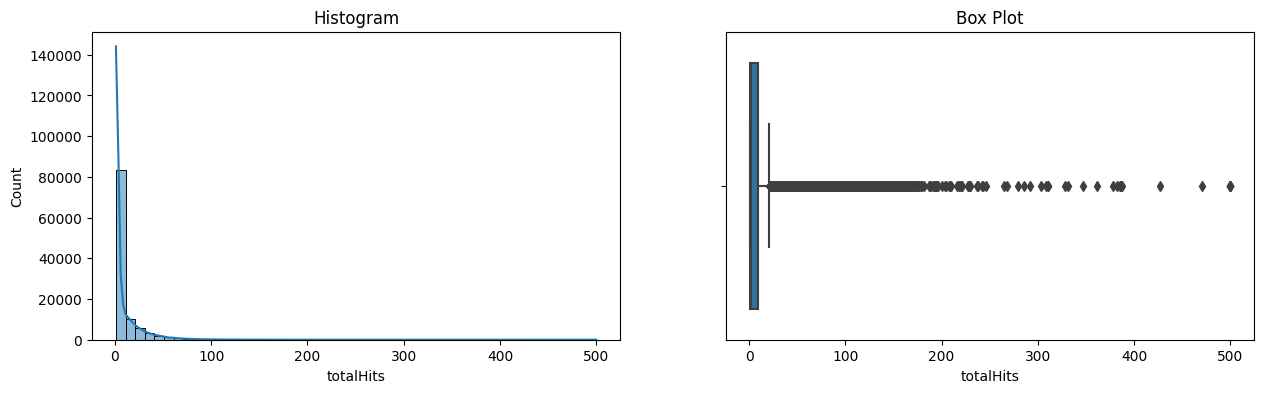

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=train_df_copy, x='totalHits', bins=50, kde=True, ax=ax1)
ax1.set_title('Histogram')

sns.boxplot(data=train_df_copy, x='totalHits', ax=ax2)
ax2.set_title('Box Plot')
plt.show()

- The distribution is **highly positively (right) skewed**, with a **large number of outliers** present.

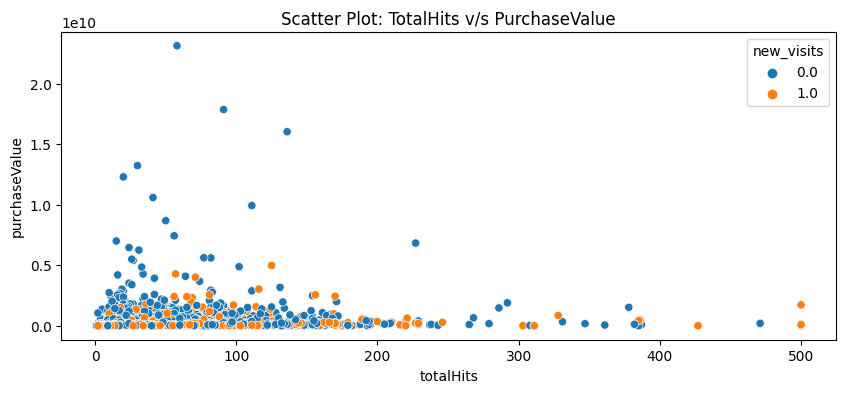

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(
    data=train_df_copy, x='totalHits', y='purchaseValue', hue='new_visits',
)
ax.set_title('Scatter Plot: TotalHits v/s PurchaseValue')
plt.show()

- **`totalHits` and `purchaseValue`** show **no clear linear relationship**, with a **low correlation coefficient of approximately 0.25**.

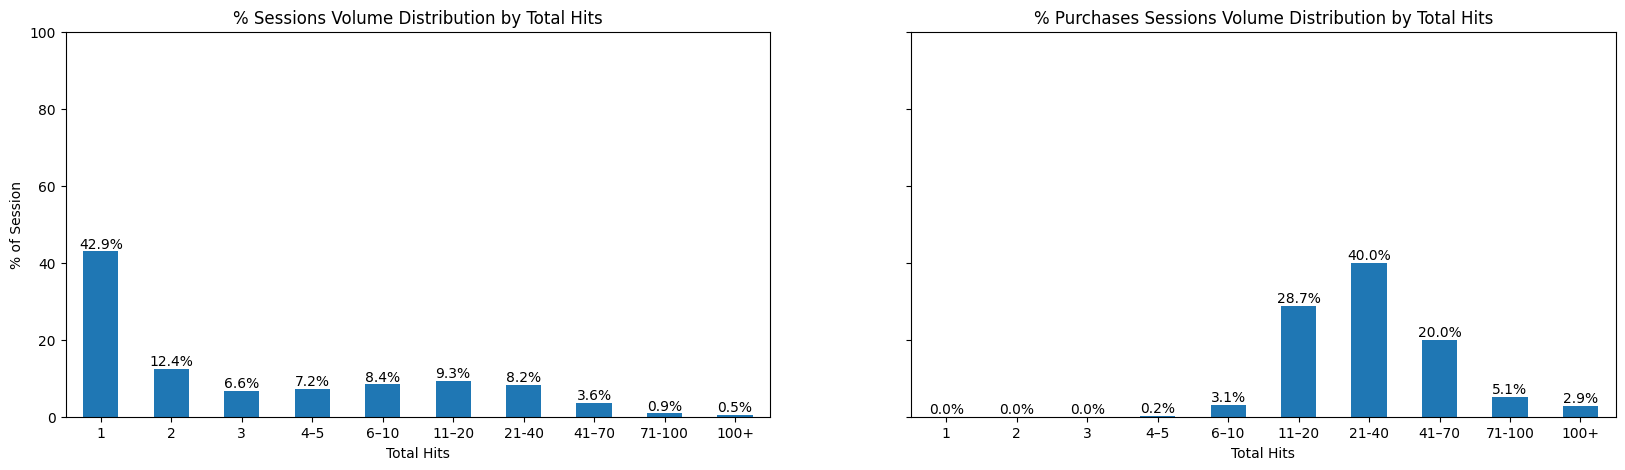

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

(
    train_df_copy['total_hits_cat']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(total_hits_labels)
    .plot(kind='bar', ax=ax1)
)
ax1.set_title('% Sessions Volume Distribution by Total Hits')
ax1.set_xlabel('Total Hits')
ax1.set_ylabel('% of Session')
ax1.set_ylim([0, 100])
ax1.set_xticks(ax1.get_xticks(), labels=ax1.get_xticklabels(), rotation=0)


(
    train_df_copy.loc[train_df_copy['purchaseValue']>0, 'total_hits_cat']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(total_hits_labels)
    .plot(kind='bar', ax=ax2)
)
ax2.set_title('% Purchases Sessions Volume Distribution by Total Hits')
ax2.set_xlabel('Total Hits')
ax2.set_xticks(ax1.get_xticks(), labels=ax1.get_xticklabels(), rotation=0)

for ax in (ax1, ax2):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            text=f'{height:.1f}%',
            xy=(bar.get_x()+bar.get_width()/2, height),
            xytext=(0.0, 0.3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

plt.show()

- **Sessions with totalHits in the range of 1–5** contribute to **only about 0.2% of purchase sessions**, indicating minimal engagement.
  
- In contrast, **sessions with totalHits between 11 and 100 or more** make up a smaller portion of total sessions but contribute to the **majority of purchase sessions**.
  
- This highlights that **higher user engagement (measured by totalHits) is strongly associated with purchase behavior**.


#### sessionNumber

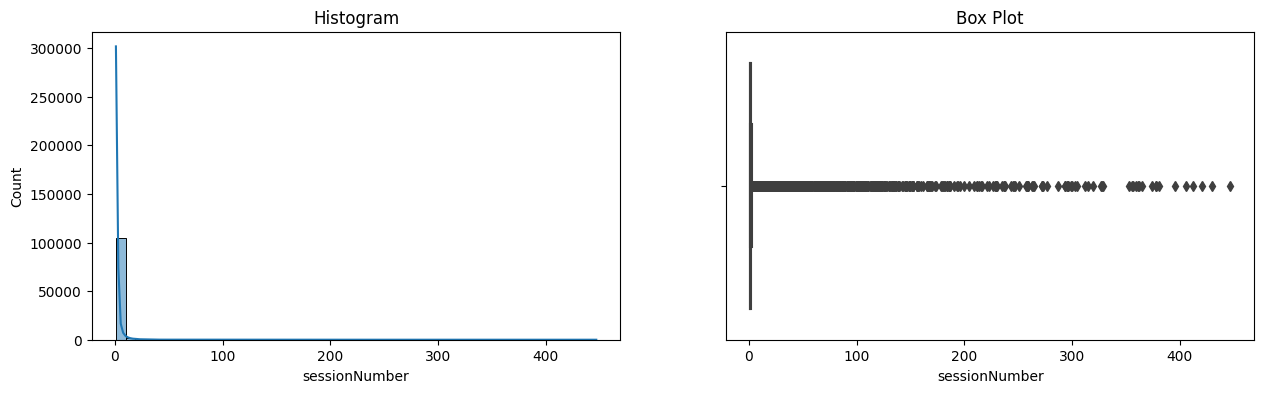

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=train_df_copy, x='sessionNumber', bins=50, kde=True, ax=ax1)
ax1.set_title('Histogram')

sns.boxplot(data=train_df_copy, x='sessionNumber', ax=ax2)
ax2.set_title('Box Plot')
plt.show()

- The distribution is **highly positively (right) skewed**, with a **large number of outliers** present.

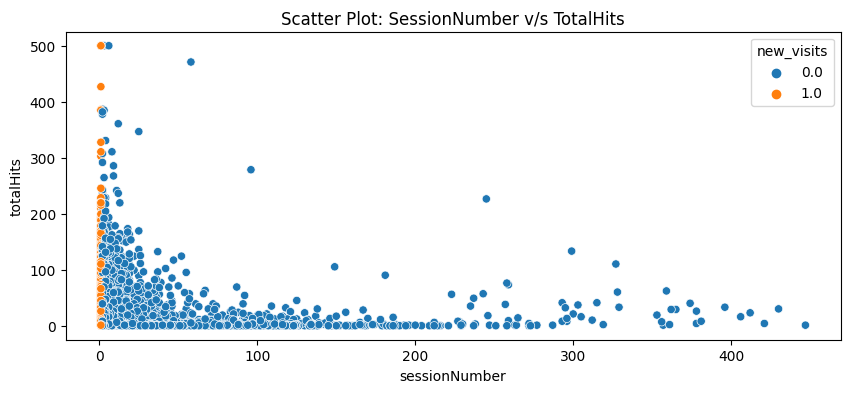

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(
    data=train_df_copy, x='sessionNumber', y='totalHits', hue='new_visits'
)
ax.set_title('Scatter Plot: SessionNumber v/s TotalHits')
plt.show()

- **`sessionNumber` and `totalHits`** show **no clear linear relationship**, with a **low correlation coefficient of approximately 0.05**.

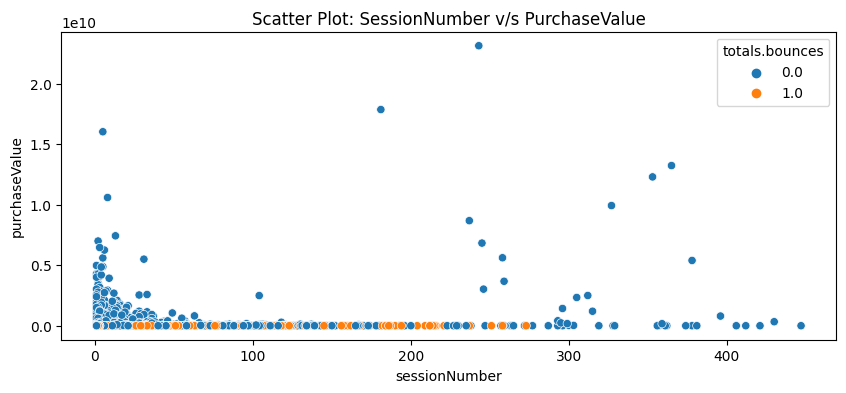

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(
    data=train_df_copy, x='sessionNumber', y='purchaseValue', hue='totals.bounces',
)
ax.set_title('Scatter Plot: SessionNumber v/s PurchaseValue')
plt.show()

- **`sessionNumber` and `purchaseValue`** show **no clear linear relationship**, with a **low correlation coefficient of approximately 0.2**.

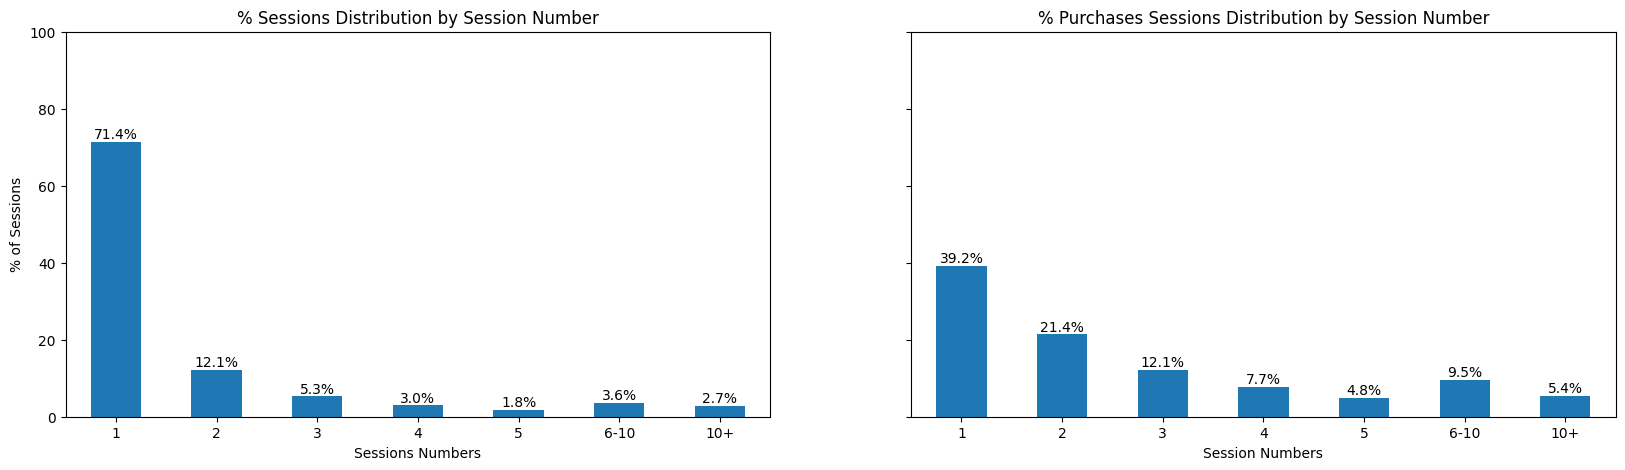

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

(
    train_df_copy['session_num_cat']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(session_num_labels)
    .plot(kind='bar', ax=ax1)
)

ax1.set_title('% Sessions Distribution by Session Number')
ax1.set_xlabel('Sessions Numbers')
ax1.set_ylabel('% of Sessions')
ax1.set_xticks(ax1.get_xticks(), labels=ax1.get_xticklabels(), rotation=0)
ax1.set_ylim([0, 100])


(
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'session_num_cat']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(session_num_labels)
    .plot(kind='bar', ax=ax2)
)

ax2.set_title('% Purchases Sessions Distribution by Session Number')
ax2.set_xlabel('Session Numbers')
ax2.set_xticks(ax1.get_xticks(), labels=ax1.get_xticklabels(), rotation=0)

for ax in (ax1, ax2):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            text=f'{height:.1f}%',
            xy=(bar.get_x()+bar.get_width()/2, height),
            xytext=(0.0, 0.3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )
plt.show()

- A **large proportion of sessions (around 71%)** are from **new visits**, which naturally leads to a **higher share of purchase sessions** compared to returning visits.
- **Sessions with higher session numbers** contribute **less to the overall session volume**, but they **significantly contribute to purchase sessions**, indicating that **repeat engagement drives conversions**.

#### pageViews

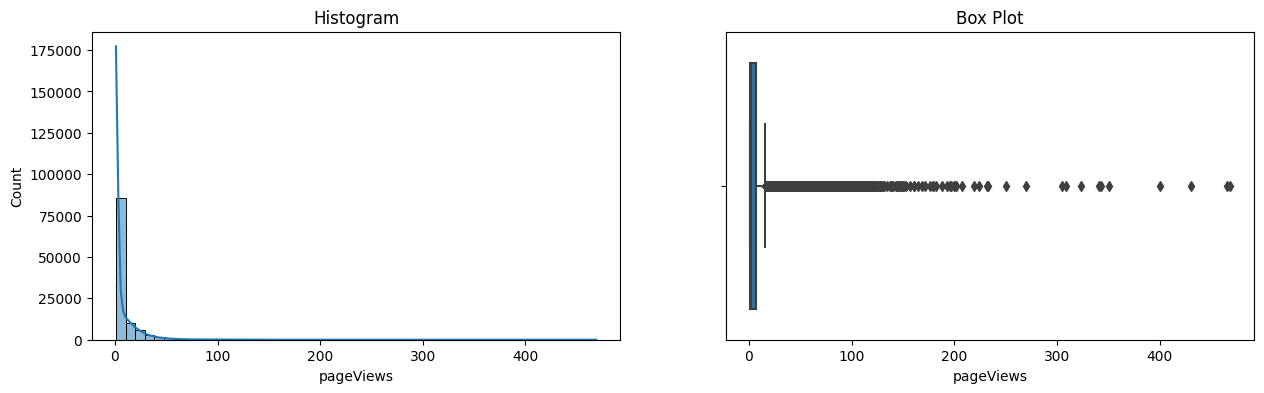

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=train_df_copy, x='pageViews', bins=50, kde=True, ax=ax1)
ax1.set_title('Histogram')

sns.boxplot(data=train_df_copy, x='pageViews', ax=ax2)
ax2.set_title('Box Plot')
plt.show()

- The distribution is **highly positively (right) skewed**, with a **large number of outliers** present.

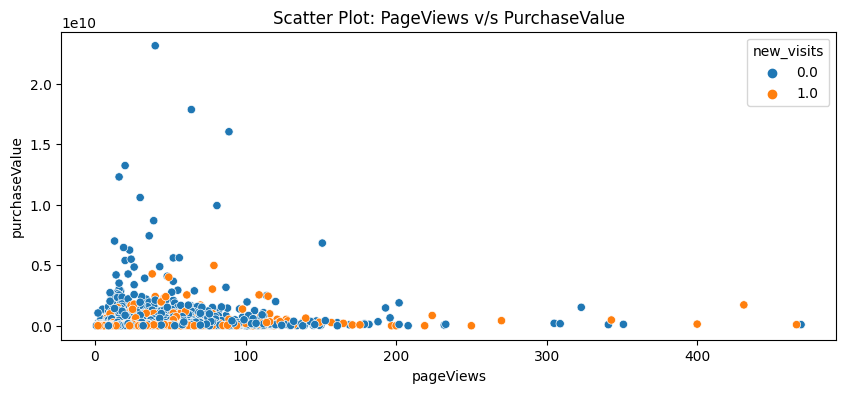

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(
    data=train_df_copy, x='pageViews', y='purchaseValue', hue='new_visits',
)
ax.set_title('Scatter Plot: PageViews v/s PurchaseValue')
plt.show()

- **`pageViews` and `purchaseValue`** show **no clear linear relationship**, with a **low correlation coefficient of approximately 0.25**.

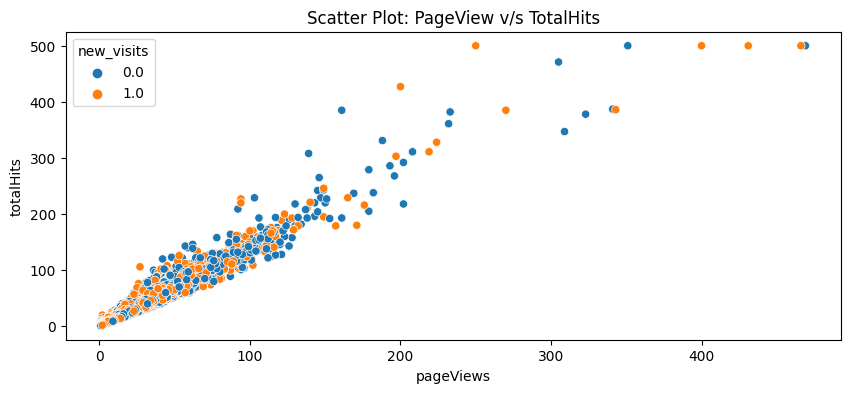

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(
    data=train_df_copy, x='pageViews', y='totalHits', hue='new_visits',
)
ax.set_title('Scatter Plot: PageView v/s TotalHits')
plt.show()

- **`pageViews` and `totalHits`** show **linear relationship**, with a **high correlation coefficient of approximately 0.99**.

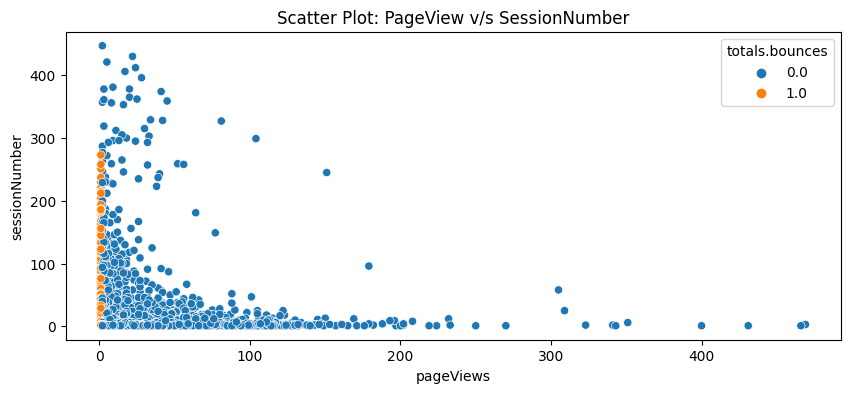

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(
    data=train_df_copy, x='pageViews', y='sessionNumber', hue='totals.bounces',
)
ax.set_title('Scatter Plot: PageView v/s SessionNumber')
plt.show()

- **`pageViews` and `sessionNumber`** show **linear relationship**, with a **high correlation coefficient of approximately 0.06**.

## Categorical Columns

#### sessionStart / date

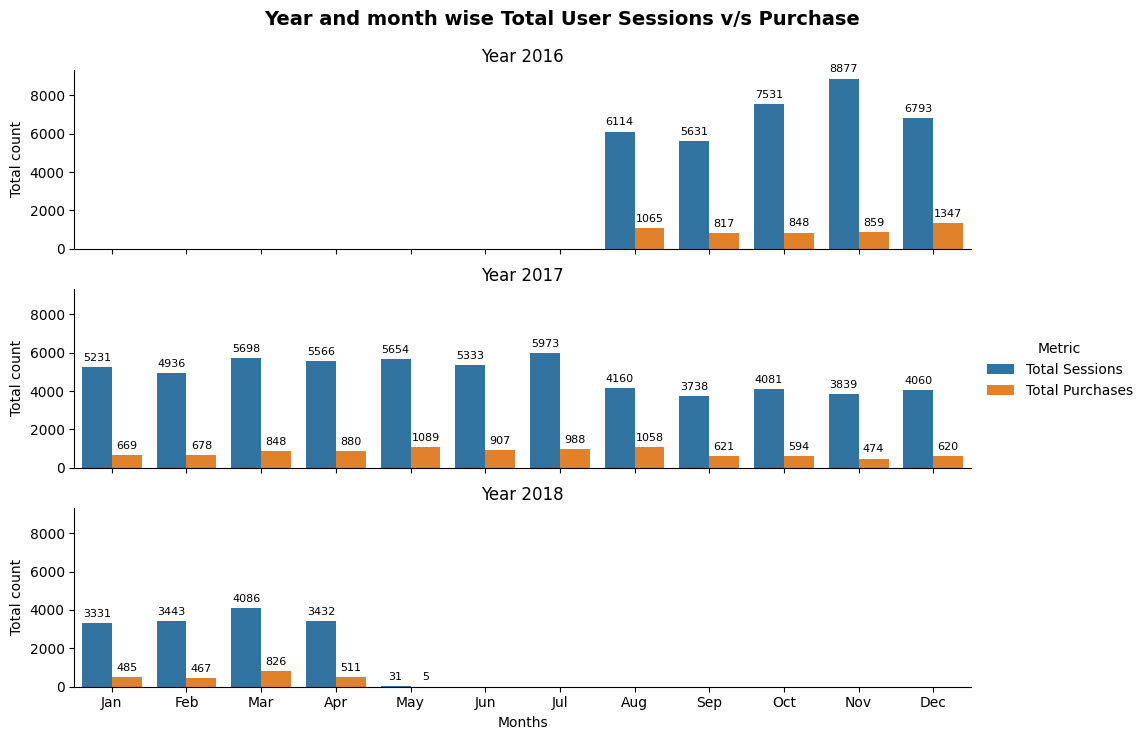

In [ ]:
year_month_sessions_purchases = (
    train_df_copy.groupby(['year', 'month'])['purchaseValue']
    .agg(
        [('total_sessions', 'count'), ('total_purchases', lambda x: x[x>0].count())]
    ).reset_index()
)

year_month_sessions_purchases_long = year_month_sessions_purchases.melt(
    id_vars=['year', 'month'], value_vars=['total_sessions', 'total_purchases'], var_name='metric', value_name='count'
)

g = sns.catplot(
        kind='bar', data=year_month_sessions_purchases_long,
        x='month', y='count',
        hue='metric', row='year', height=2.5, aspect=4)

g.fig.suptitle('Year and month wise Total User Sessions v/s Purchase', fontsize=14, fontweight='semibold')

for i, axes in enumerate(g.axes.flatten()):
    axes.set_title(f'Year {2016+i}', fontsize=12)
    axes.set_xlabel('Months')
    axes.set_ylabel('Total count')
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(month_labels)

    for bar in axes.patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        if height > 0:
            axes.annotate(f'{int(height)}',
                          xy=(x, height),
                          xytext=(0, 3),
                          textcoords='offset points',
                          ha='center', va='bottom', fontsize=8)

g._legend.set_title("Metric")
for t, label in zip(g._legend.texts, ['Total Sessions', 'Total Purchases']):
    t.set_text(label)

plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
avg_purchase_vol = year_month_sessions_purchases_long.loc[lambda _df: _df['metric'] == 'total_purchases', 'count'].mean()
print(f'Average monthly total purchases count is {round(avg_purchase_vol, 2)} of 21 months period', '\n')

avg_user_sessions = year_month_sessions_purchases_long.loc[lambda _df: _df['metric'] == 'total_sessions', 'count'].mean()
print(f'Average monthly user sessions count is {round(avg_user_sessions, 2)} of 21 months period.')

Average monthly total purchases count is 757.09 of 21 months period 

Average monthly user sessions count is 4888.09 of 21 months period.


- The **training dataset** contains user session activity data from approximately **August 2016 to May 2018**.
  
- **Peak user activity and purchase volume** occurred between **October 2016 and July 2017**. After this period, there is a **noticeable decline** in both user engagement and purchases.

  
- **User activity in 2018** is **significantly lower** compared to the previous year, indicating a downward trend in engagement.

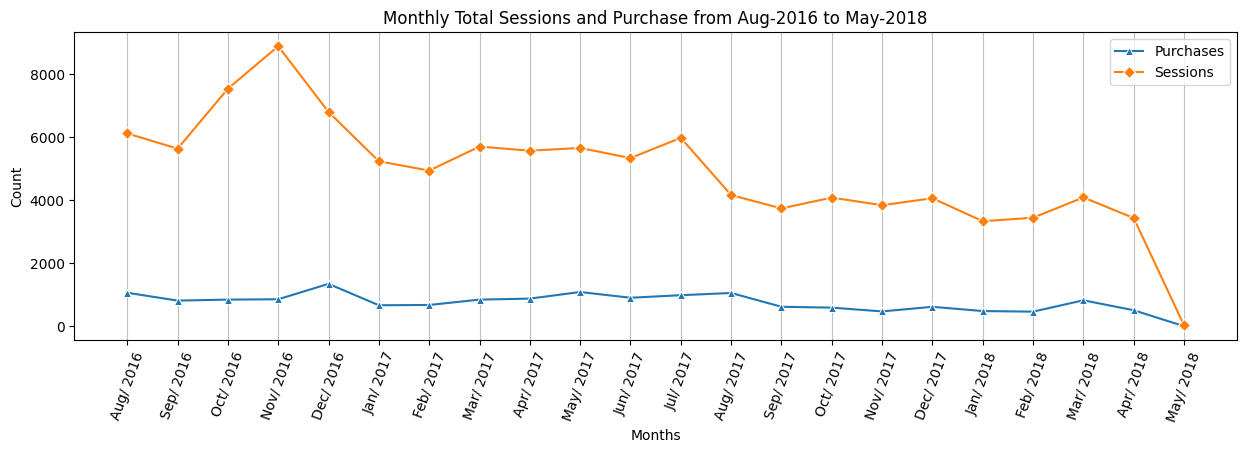

In [ ]:
plt.figure(figsize=(15, 4))

sns.lineplot(data=year_month_sessions_purchases, x=year_month_sessions_purchases.index, y='total_purchases', label='Purchases', marker='^')
sns.lineplot(data=year_month_sessions_purchases, x=year_month_sessions_purchases.index, y='total_sessions', label='Sessions', marker='D')

plt.title('Monthly Total Sessions and Purchase from Aug-2016 to May-2018')

plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(ticks=range(len(year_month_sessions_purchases)),
           labels=(year_month_sessions_purchases['month'].apply(lambda x: month_labels[x-1]) + '/ ' + year_month_sessions_purchases['year'].astype(str)).values.tolist(),
           rotation=70)
plt.grid(axis='x', alpha=0.8)
plt.show()

- The **average total purchases per month** remain relatively **stable** over the 21-month period, showing only **minor variations or trends**.
  
- In contrast, **user traffic exhibits significant fluctuations** throughout the same period.

  
- A **sharp peak in user traffic** is observed in **November 2016**, followed by a brief period of stability. A **second peak** occurs in **July 2017**, after which there is a **notable and sustained decline** in user traffic for the remaining months.

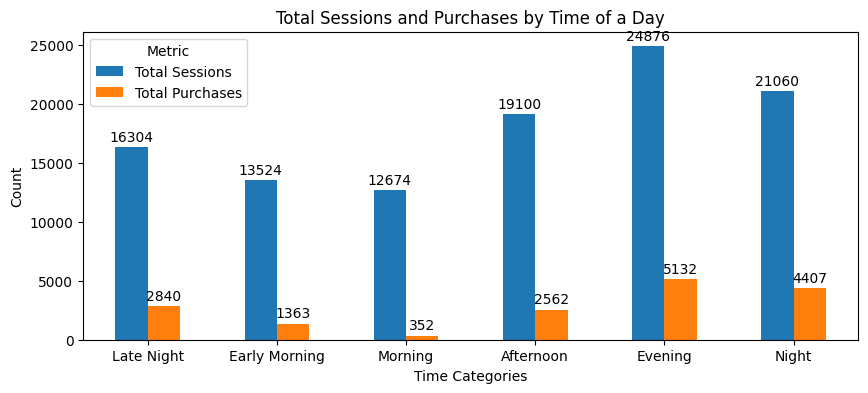

In [ ]:
ax = train_df_copy.groupby(['time_category'], observed=False)['purchaseValue'].agg(
    [('total_sessions', 'count'), ('total_purchases', lambda x: x[x>0].count())]
).plot(kind='bar', figsize=(10, 4))

plt.title('Total Sessions and Purchases by Time of a Day')
plt.xlabel('Time Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 2),  # offset
            textcoords='offset points',
            ha='center',
            va='bottom'
        )


plt.legend(title='Metric', labels=['Total Sessions', 'Total Purchases'], loc='upper left')
plt.show()

- **Evening hours (16:00–20:00)** show **peak user activity, engagement, and purchase volume** compared to other times of the day.
  
- From **evening to late night**, the **purchase conversion rate** is **significantly higher** than during daytime hours.

- From **early morning to afternoon**, both **user activity and purchases** remain **relatively low**.

- Interestingly, **late-night user activity and purchases** are **comparatively higher than typical daytime hours**. As the day progresses, there is a **notable increase in user engagement**, peaking in the evening.

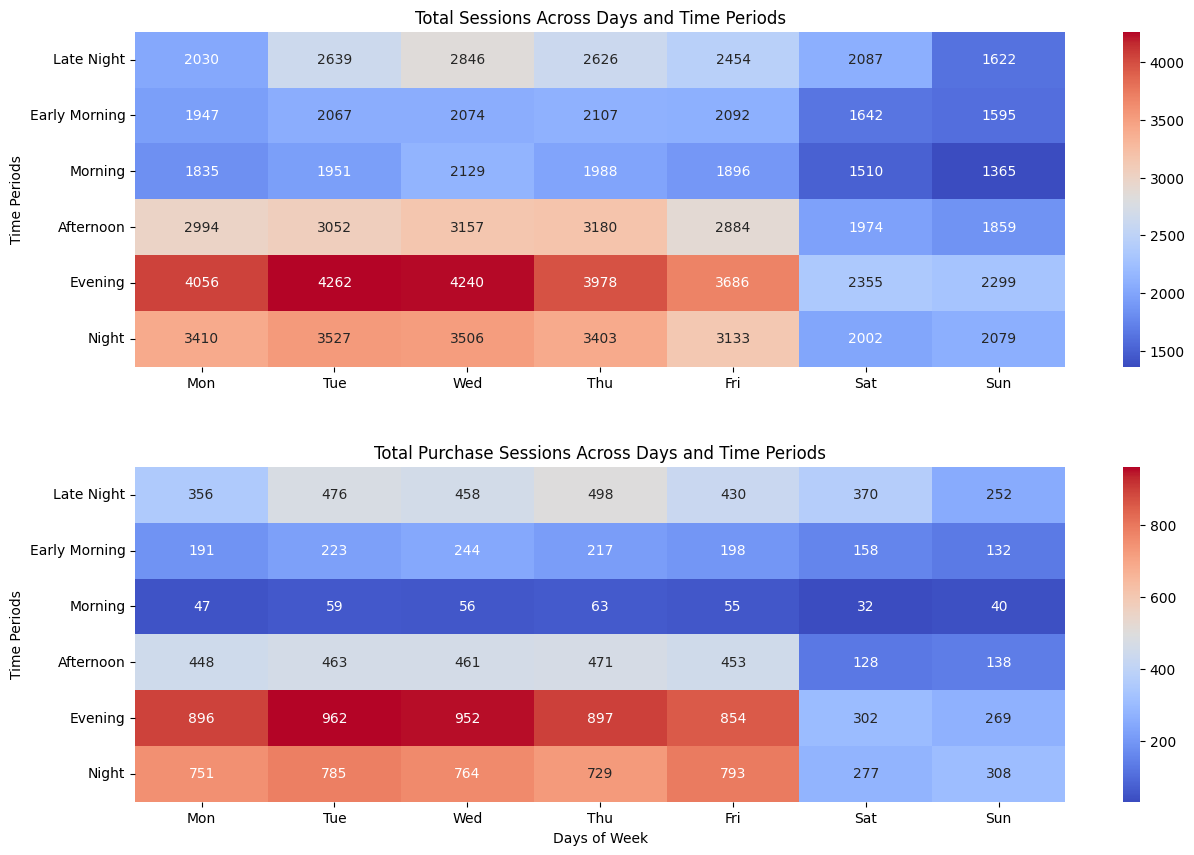

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=False)

sns.heatmap(
    data= pd.crosstab(
        columns=train_df_copy['day_of_week'].sort_values().apply(lambda x: day_labels[x]),
        index=train_df_copy['time_category']
    )[day_labels],
    annot=True, fmt='d', cmap='coolwarm', ax=ax1
)
ax1.set_title('Total Sessions Across Days and Time Periods')
ax1.set_xlabel('')
ax1.set_ylabel('Time Periods')

sns.heatmap(
    data= pd.crosstab(
        columns=train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'day_of_week'].sort_values().apply(lambda x: day_labels[x]),
        index=train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'time_category']
    )[day_labels],
    annot=True, fmt='d', cmap='coolwarm', ax=ax2
)
ax2.set_title('Total Purchase Sessions Across Days and Time Periods')
ax2.set_xlabel('Days of Week')
ax2.set_ylabel('Time Periods')

plt.subplots_adjust(hspace=0.3)
plt.show()

-  User traffic getting peak evening to about late night, from early to business hour has relatively low sessions and purchases
-  on weekend user traffic is compartively lesser than on weekdays

#### geoNetwork.continent

In [ ]:
continent_user_traffic = train_df_copy.groupby(['geoNetwork.continent']).agg({
    'purchaseValue': [('total_sessions', 'count'), ('total_purchases', lambda x: x[x>0].count())],
    'userId': [('total_users', 'nunique'),
               ('total_buyers', lambda s: pd.concat([s, train_df_copy.loc[s.index, 'purchaseValue']], axis=1).loc[lambda x: x['purchaseValue']>0, 'userId'].nunique())]
})

continent_user_traffic

purchaseValue                      userId             
                     total_sessions total_purchases total_users total_buyers
geoNetwork.continent                                                        
(not set)                       129               5         124            4
Africa                         1732              11        1717            9
Americas                      62109           16329       56131        14349
Asia                          22006             174       21554          166
Europe                        19983             113       19478          109
Oceania                        1579              24        1554           22

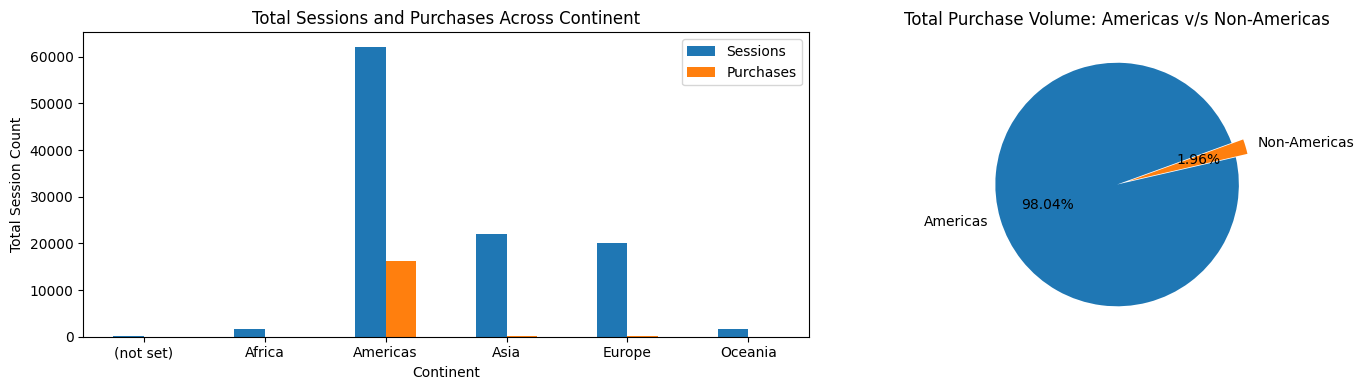

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))


continent_user_traffic['purchaseValue'].plot(kind='bar', ax=ax1)
ax1.set_title('Total Sessions and Purchases Across Continent')
ax1.set_xlabel('Continent')
ax1.set_ylabel('Total Session Count')
ax1.set_xticklabels(continent_user_traffic.index.get_level_values(0), rotation=0)
ax1.legend(['Sessions', 'Purchases'])


purchases_americas = continent_user_traffic.loc['Americas', pd.IndexSlice['purchaseValue', 'total_purchases']]
purchases_non_americas = (
    continent_user_traffic.loc[
        lambda _df: _df.index.get_level_values(0) != 'Americas', pd.IndexSlice['purchaseValue', 'total_purchases']].sum()

)
ax2.pie(
    [purchases_americas, purchases_non_americas], autopct='%0.2f%%',
    labels=['Americas', 'Non-Americas'], explode=(0.0, 0.1), startangle=20
)
ax2.set_title('Total Purchase Volume: Americas v/s Non-Americas')

plt.tight_layout()
plt.show()

- User traffic largly comes from `Americas` continent.
  
- Big portion of Total Purchase volume around `98%` comes from `Americas` continent.
  
- There is significant user activity/engagemet comes from other continent like `Asia` and `Europe` but very less contibute to purchase volume.
  
- This suggests that most of target user/customer is located in the `Americas` continent.

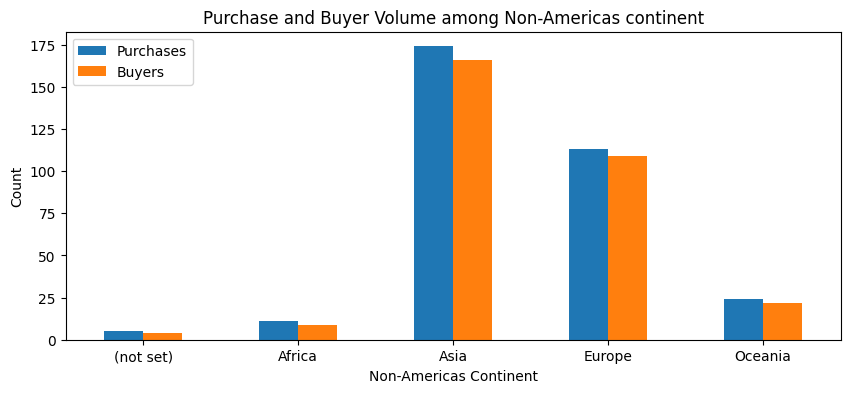

In [ ]:
non_americas_purchas_buyers = continent_user_traffic.loc[
    lambda _df: _df.index.get_level_values(0)!='Americas',
    pd.IndexSlice[['purchaseValue', 'userId'], ['total_purchases', 'total_buyers']]
]

ax = non_americas_purchas_buyers.plot(kind='bar', figsize=(10, 4), )

ax.legend(['Purchases', 'Buyers'], loc='upper left')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels=non_americas_purchas_buyers.index.tolist(), rotation=0)
ax.set_xlabel('Non-Americas Continent')
ax.set_ylabel('Count')
ax.set_title('Purchase and Buyer Volume among Non-Americas continent')

plt.show()

- Other continents have below `200` total number of purchase session which is way lesser than `Americas`.

- `Asia` perform better than all other non-americas continent.
  
- After `Americas` continent, both `Asia` and `Europe` demonstarte high user engagement yet they contribute very little to purchases or buyers volume.

- There is significant opportunity to improve conversion of potential users into buyers.

#### geoNetwork.subContinent

In [ ]:
geocont_with_subcont_user_traffic = train_df_copy.groupby(['geoNetwork.continent', 'geoNetwork.subContinent']).agg({
    'purchaseValue': [('total_sessions', 'count'), ('total_purchases', lambda x: x[x>0].count())],
    'userId': [('total_users', 'nunique'),
               ('total_buyers', lambda s: pd.concat([s, train_df_copy.loc[s.index, 'purchaseValue']], axis=1).loc[lambda x: x['purchaseValue']>0, 'userId'].nunique())]
})

geocont_with_subcont_user_traffic

purchaseValue                  \
                                             total_sessions total_purchases   
geoNetwork.continent geoNetwork.subContinent                                  
(not set)            (not set)                          129               5   
Africa               Eastern Africa                     189               3   
                     Middle Africa                       45               0   
                     Northern Africa                    925               3   
                     Southern Africa                    263               3   
                     Western Africa                     310               2   
Americas             Caribbean                          235              18   
                     Central America                   1636              30   
                     Northern America                 56005           16168   
                     South America                     4233             113   
Asia                 Central Asia                       129               2   
                     Eastern Asia                      4925              76   
                     Southeast Asia                    7025              53   
                     Southern Asia                     6405              19   
                     Western Asia                      3522              24   
Europe               Eastern Europe                    4210              19   
                     Northern Europe                   5908              38   
                     Southern Europe                   3698              10   
                     Western Europe                    6167              46   
Oceania              Australasia                       1561              24   
                     Melanesia                            5               0   
                     Micronesian Region                  11               0   
                     Polynesia                            2               0   

                                                  userId               
                                             total_users total_buyers  
geoNetwork.continent geoNetwork.subContinent                           
(not set)            (not set)                       124            4  
Africa               Eastern Africa                  185            2  
                     Middle Africa                    45            0  
                     Northern Africa                 917            3  
                     Southern Africa                 262            3  
                     Western Africa                  308            1  
Americas             Caribbean                       231           18  
                     Central America                1605           30  
                     Northern America              50183        14219  
                     South America                  4126           88  
Asia                 Central Asia                    129            2  
                     Eastern Asia                   4763           72  
                     Southeast Asia                 6915           50  
                     Southern Asia                  6289           19  
                     Western Asia                   3459           23  
Europe               Eastern Europe                 4111           19  
                     Northern Europe                5765           37  
                     Southern Europe                3596           10  
                     Western Europe                 6011           43  
Oceania              Australasia                    1536           22  
                     Melanesia                         5            0  
                     Micronesian Region               11            0  
                     Polynesia                         2            0

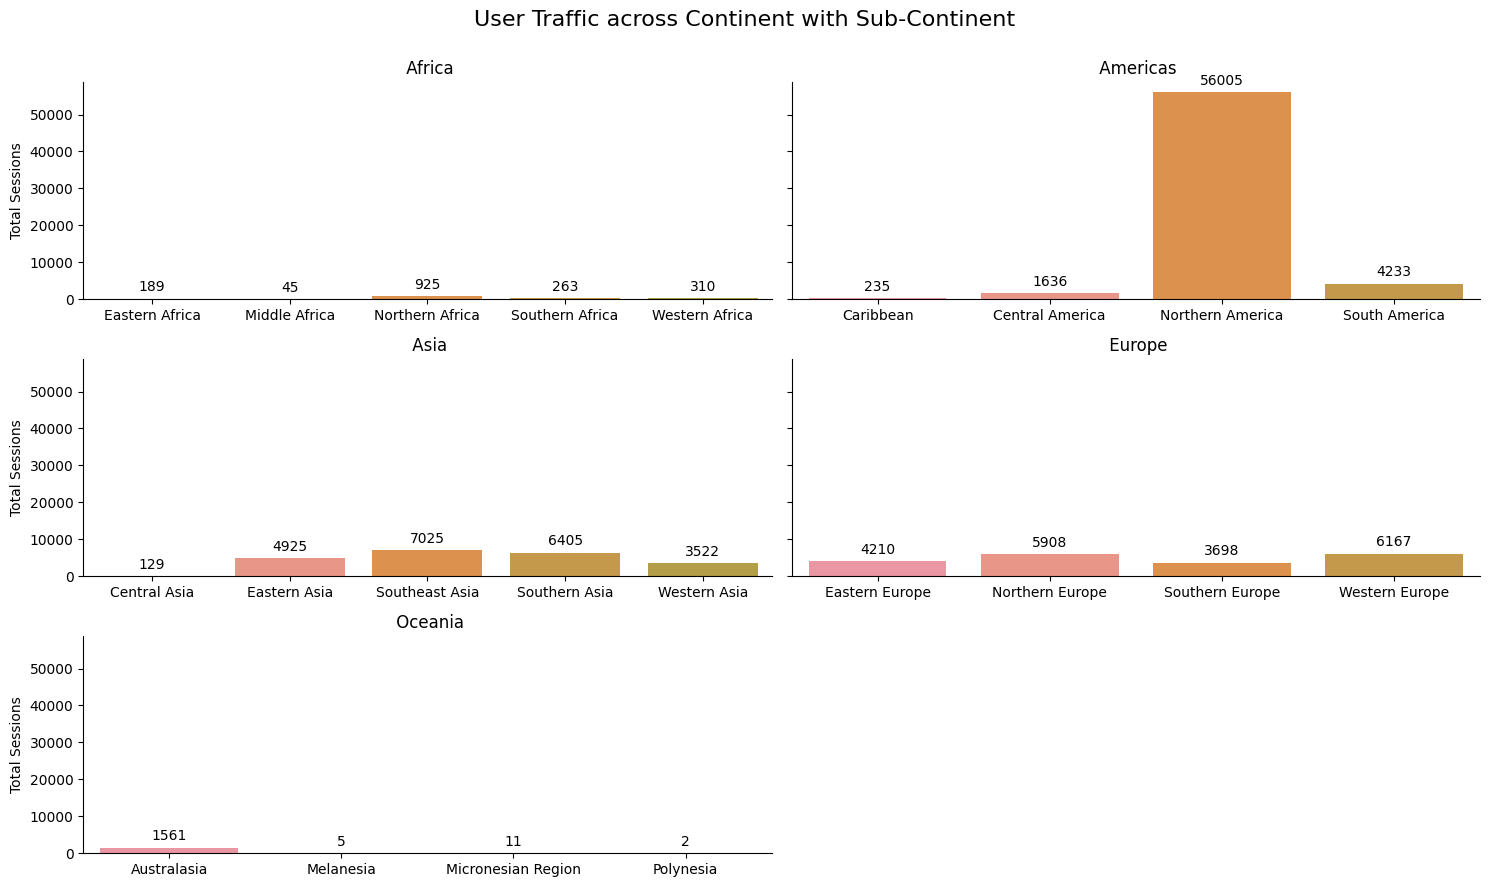

In [ ]:
g = sns.catplot(data=geocont_with_subcont_user_traffic['purchaseValue'].reset_index()[1:], kind='bar',
                x='geoNetwork.subContinent', y='total_sessions',
                col='geoNetwork.continent', col_wrap=2, sharex=False, height=3, aspect=2.5)

g.fig.suptitle('User Traffic across Continent with Sub-Continent', fontsize=16)
for axes in g.axes:
    axes.set_title(axes.title.get_text().split('=')[-1], fontsize=12)
    axes.set_ylabel('Total Sessions')
    axes.set_xlabel('')

    for bar in axes.patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width()/2
        axes.annotate(
            text=f'{int(height)}',
            xy=(x, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center', va='bottom'
        )

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

- The subcontinent **Northern America** has the **highest user traffic** among all American subcontinents, suggesting that a **significant portion of purchase volume** likely originates from this region.
  
- The continents **Asia** and **Europe** show **relatively balanced user traffic** across their subcontinents, yet they contribute **considerably less to purchase volume** compared to the **Americas**.

  
- There is a need to investigate potential **conversion issues** in **Asia** and **Europe** to **unlock untapped purchasing potential** in those regions.

  
- Based on current traffic and conversion trends, our **core target user base is further narrowed down to the Northern America subcontinent**.

#### locationCountry

In [ ]:
countries_user_traffic = (
    train_df_copy.groupby(['geoNetwork.continent', 'locationCountry'])
    .size()
    .reset_index(name='total_sessions')
)

countries_user_traffic

,geoNetwork.continent,locationCountry,total_sessions
0,(not set),(not set),129
1,Africa,Algeria,194
2,Africa,Angola,9
3,Africa,Benin,8
4,Africa,Botswana,1
...,...,...,...
188,Oceania,Guam,8
189,Oceania,Marshall Islands,1
190,Oceania,New Caledonia,3
191,Oceania,New Zealand,250


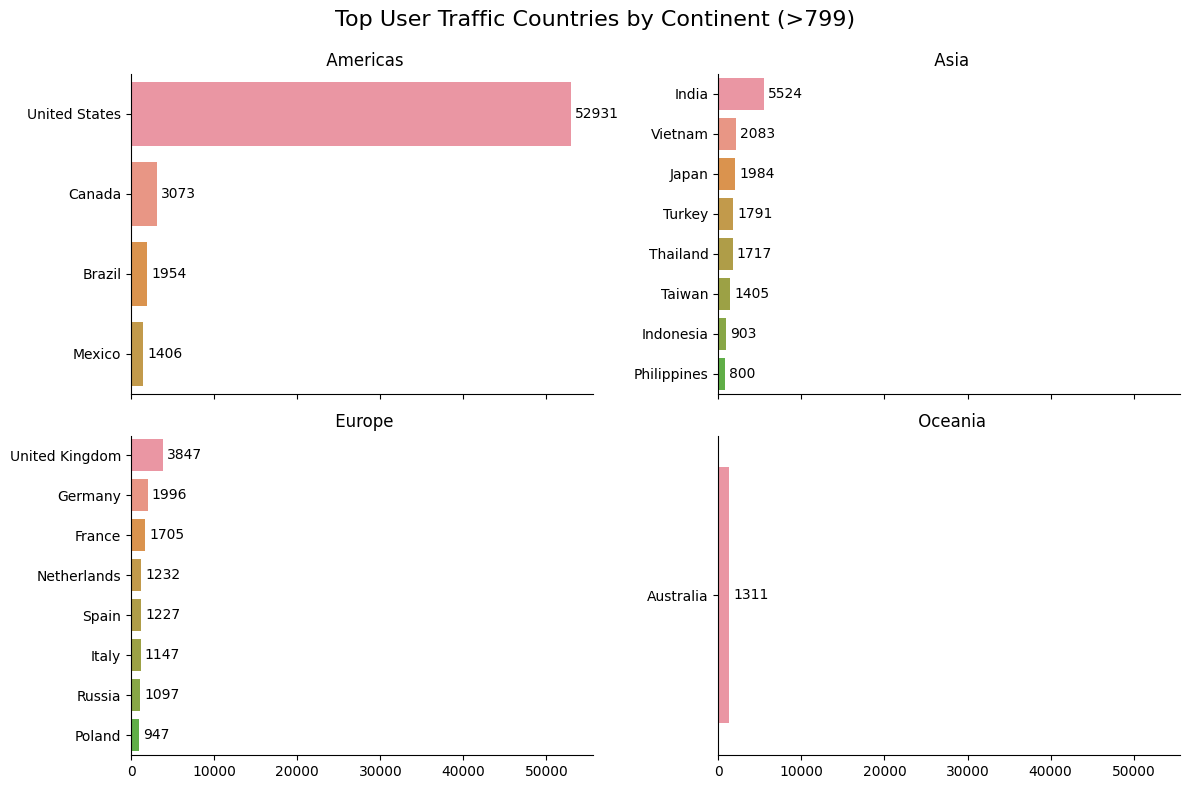

In [ ]:
g = sns.catplot(
        data=countries_user_traffic.loc[lambda _df: _df['total_sessions']>799].sort_values(by=['total_sessions'], ascending=False), kind='bar',
        y='locationCountry', x='total_sessions',
        col='geoNetwork.continent', col_wrap=2, sharey=False, height=4, aspect=1.5
)

g.fig.suptitle('Top User Traffic Countries by Continent (>799)', fontsize=16)

for axes in g.axes:
    axes.set_title(axes.title.get_text().split('=')[-1], fontsize=12)
    axes.set_ylabel('')
    axes.set_xlabel('')

    for bar in axes.patches:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height()/2
        axes.annotate(
            text=f'{int(width)}',
            xy=(width, y),
            xytext=(3, 0),
            textcoords='offset points',
            ha='left', va='center'
        )

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

- Top countries based on user traffics are `United States`, `India`, `United Kingdom`, `Canada`
- Our target user is mostly out of `United States`,

#### geoNetwork.region

In [ ]:
region_user_traffic = train_df_copy.groupby(['geoNetwork.region'])['purchaseValue'].count().sort_values(ascending=False)
region_user_purchases = train_df_copy.loc[train_df_copy['purchaseValue']>0].groupby(['geoNetwork.region'])['purchaseValue'].count().sort_values(ascending=False)

pd.merge(region_user_traffic, region_user_purchases, how='left', on=['geoNetwork.region'])

,purchaseValue_x,purchaseValue_y
geoNetwork.region,,
not available in demo dataset,56571,6416.0
California,15891,5077.0
New York,4659,2146.0
(not set),2731,62.0
Texas,1394,448.0
...,...,...
Oran Province,1,NaN
State of Mexico,1,NaN
State of Mato Grosso,1,NaN


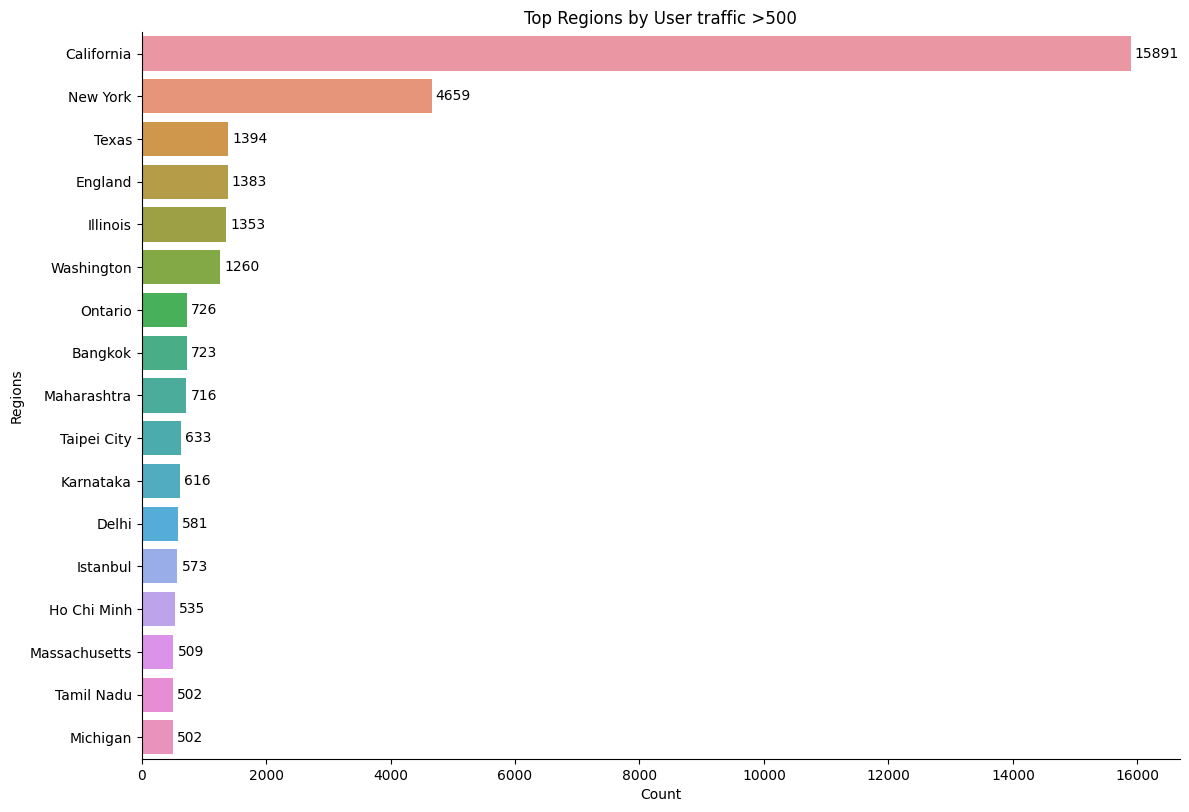

In [ ]:
x = (
    region_user_traffic[region_user_traffic>500]
    .reset_index(name='total_sessions')
    .loc[lambda _df: ~_df['geoNetwork.region'].isin(['not available in demo dataset', '(not set)'])]
)

g = sns.catplot(
    data=x, kind='bar',
    y='geoNetwork.region', x='total_sessions', height=8, aspect=1.5
)

g.fig.axes[0].set_title('Top Regions by User traffic >500')
g.fig.axes[0].set_xlabel('Count')
g.fig.axes[0].set_ylabel('Regions')


for bar in g.fig.axes[0].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height()/2
    g.fig.axes[0].annotate(
        text=f'{int(width)}',
        xy=(width, y),
        xytext=(3, 0),
        textcoords='offset points',
        ha='left', va='center'
    )
plt.show()

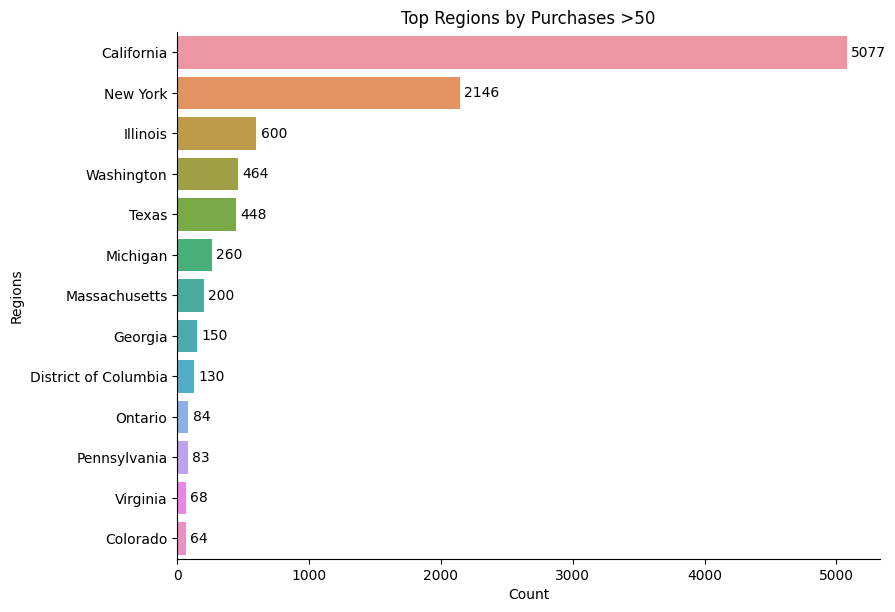

In [ ]:
x = (
    region_user_purchases[region_user_purchases>50]
    .reset_index(name='total_sessions')
    .loc[lambda _df: ~_df['geoNetwork.region'].isin(['not available in demo dataset', '(not set)'])]
)

g = sns.catplot(
    data=x, kind='bar',
    y='geoNetwork.region', x='total_sessions', height=6, aspect=1.5
)

g.fig.axes[0].set_title('Top Regions by Purchases >50')
g.fig.axes[0].set_xlabel('Count')
g.fig.axes[0].set_ylabel('Regions')


for bar in g.fig.axes[0].patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height()/2
    g.fig.axes[0].annotate(
        text=f'{int(width)}',
        xy=(width, y),
        xytext=(3, 0),
        textcoords='offset points',
        ha='left', va='center'
    )
plt.show()

#### trafficSource

In [ ]:
train_df_copy['trafficSource'].value_counts()

trafficSource
Google        41940
Direct        33090
Youtube       18934
Google-Eco     8483
Other          2231
Partners       1755
Facebook        694
Bing            218
Yahoo           193
Name: count, dtype: int64

In [ ]:
source_users_traffic = (
    train_df_copy
    .groupby(['trafficSource'])
    .agg({
        'purchaseValue': [
            ('total_sessions', 'count'), ('total_purchases', lambda s: s[s>0].count())
        ],
        'userId': [
            ('total_users', 'nunique'), ('total_buyers', lambda x: train_df_copy.loc[x.index].loc[lambda _df: _df['purchaseValue']>0, 'userId'].nunique())
        ]
    })
)

source_users_traffic

purchaseValue                      userId             
              total_sessions total_purchases total_users total_buyers
trafficSource                                                        
Bing                     218              29         209           29
Direct                 33090            8682       30499         7774
Facebook                 694              42         666           39
Google                 41940            4875       40154         4512
Google-Eco              8483            2744        7818         2521
Other                   2231             215        2128          188
Partners                1755              15        1711           15
Yahoo                    193              33         185           32
Youtube                18934              21       18802           21

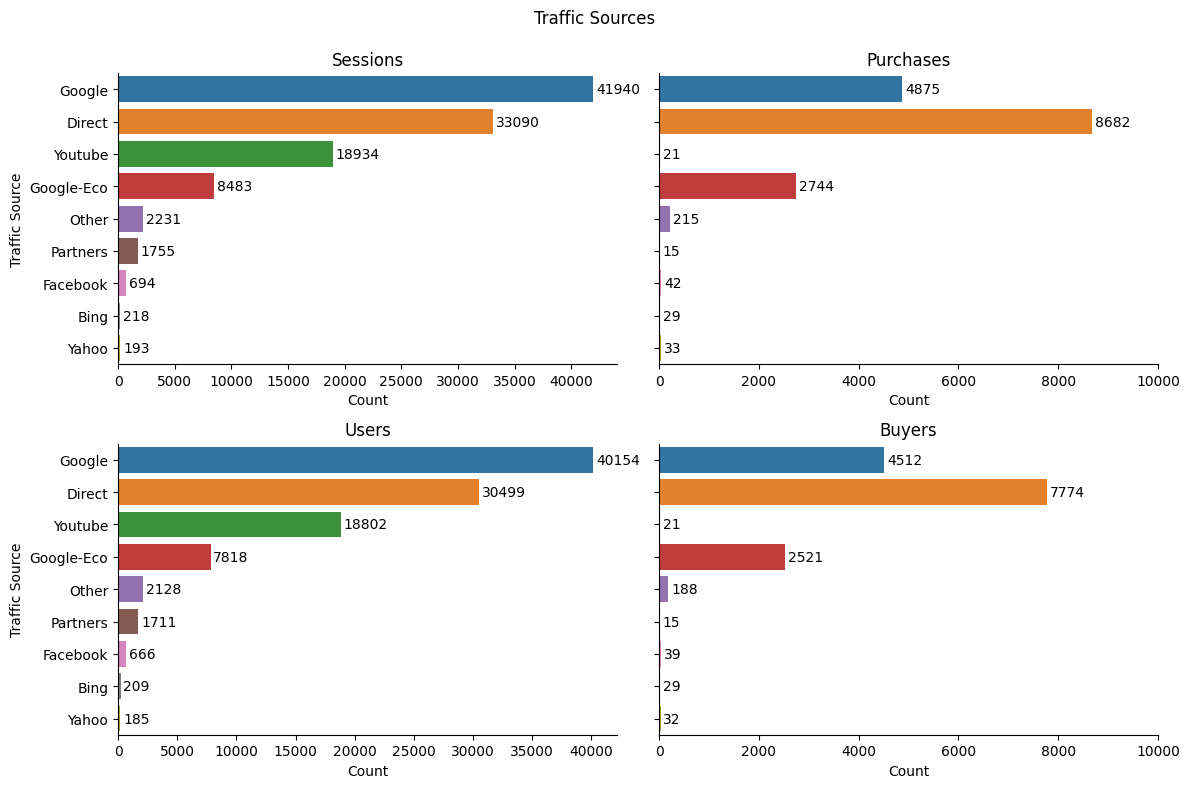

In [ ]:
x = (
    source_users_traffic
    .droplevel(level=0, axis=1)
    .reset_index()
    .sort_values(['total_sessions'], ascending=False)
    .melt(id_vars=['trafficSource'], value_vars=['total_sessions','total_purchases','total_users','total_buyers'], var_name='metric', value_name='count')
)

g = sns.catplot(kind='bar', data=x, y='trafficSource', x='count', col='metric', col_wrap=2, height=4, aspect=1.5, sharex=False)
g.fig.axes[1].set_xlim([0, 10000])
g.fig.axes[3].set_xlim([0, 10000])
g.fig.suptitle('Traffic Sources')

for axes in g.fig.axes:
    axes.set_title(axes.get_title().split('_')[-1].title())
    axes.set_ylabel('Traffic Source')
    axes.set_xlabel('Count')

    for bar in axes.patches:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height()/2
        axes.annotate(
            text=f'{int(width)}',
            xy=(width, y),
            xytext=(2, 0),
            textcoords='offset points',
            ha='left', va='center'
        )


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

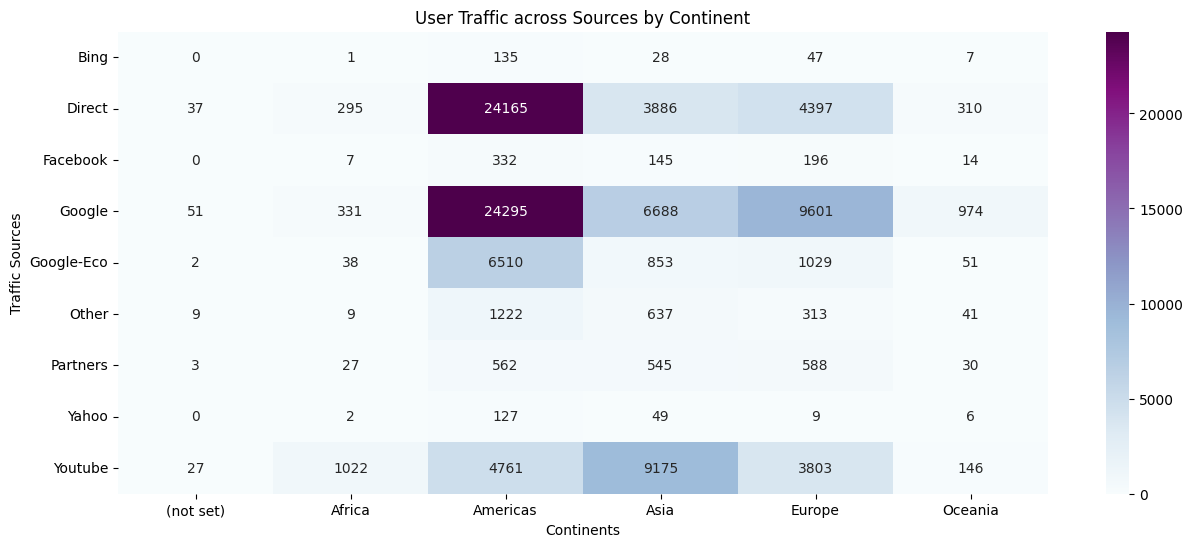

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
    data=pd.crosstab(index=train_df_copy['trafficSource'], columns=train_df_copy['geoNetwork.continent']),
    annot=True, fmt='d', cmap='BuPu'
)
ax.set_title('User Traffic across Sources by Continent')
ax.set_xlabel('Continents')
ax.set_ylabel('Traffic Sources')
plt.show()

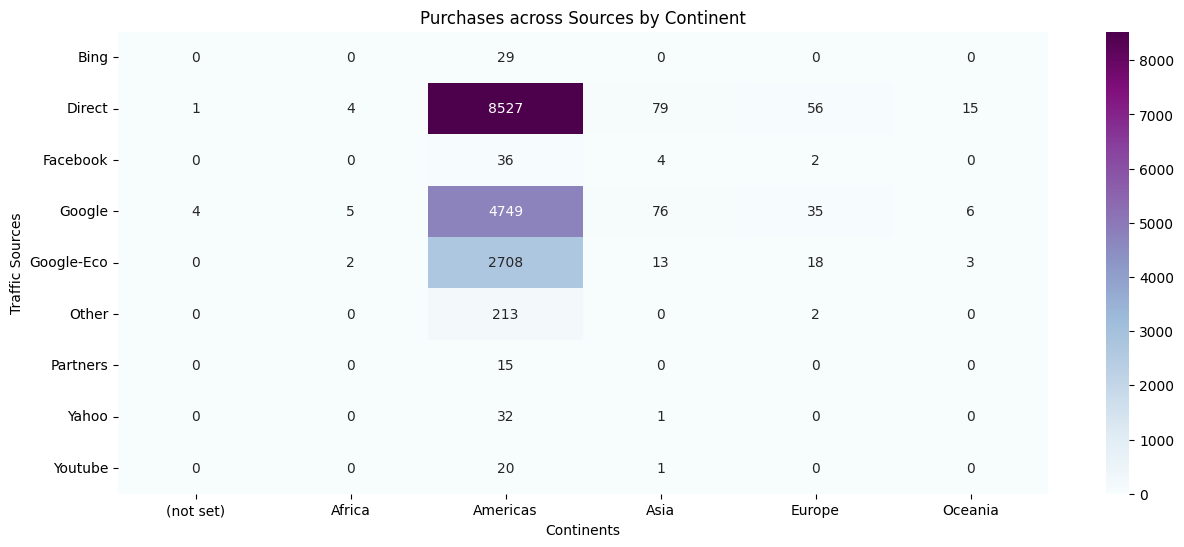

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
    data=pd.crosstab(index=train_df_copy.loc[train_df_copy['purchaseValue']>0, 'trafficSource'], columns=train_df_copy['geoNetwork.continent']),
    annot=True, fmt='d', cmap='BuPu'
)
ax.set_title('Purchases across Sources by Continent')
ax.set_xlabel('Continents')
ax.set_ylabel('Traffic Sources')
plt.show()

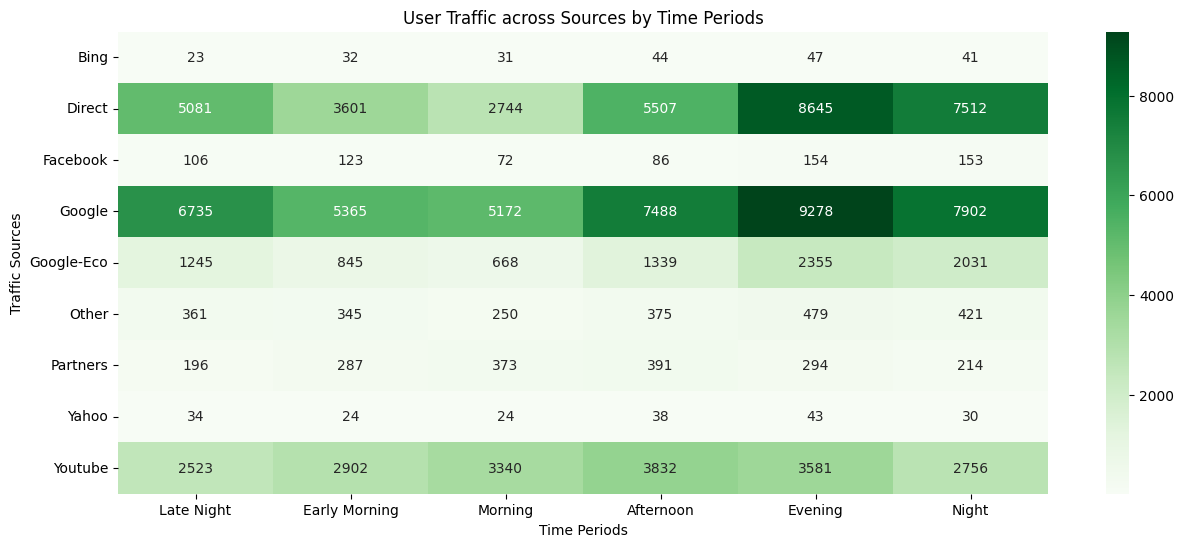

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
    data=pd.crosstab(index=train_df_copy['trafficSource'], columns=train_df_copy['time_category']),
    annot=True, fmt='d', cmap='Greens'
)
ax.set_title('User Traffic across Sources by Time Periods')
ax.set_xlabel('Time Periods')
ax.set_ylabel('Traffic Sources')
plt.show()

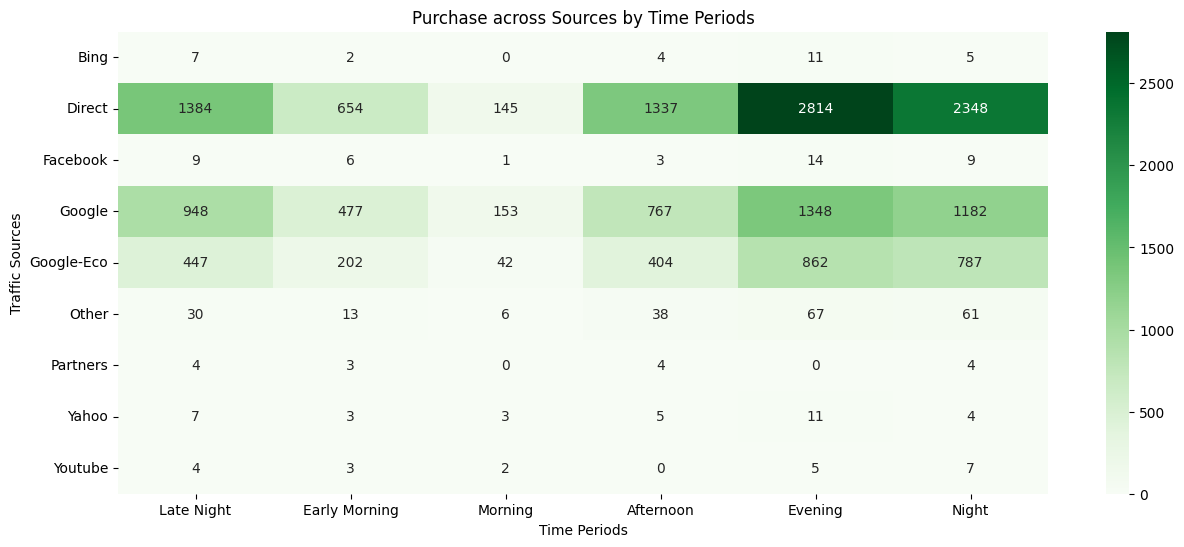

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
    data=pd.crosstab(index=train_df_copy.loc[train_df_copy['purchaseValue']>0, 'trafficSource'], columns=train_df_copy['time_category']),
    annot=True, fmt='d', cmap='Greens'
)
ax.set_title('Purchase across Sources by Time Periods')
ax.set_xlabel('Time Periods')
ax.set_ylabel('Traffic Sources')
plt.show()

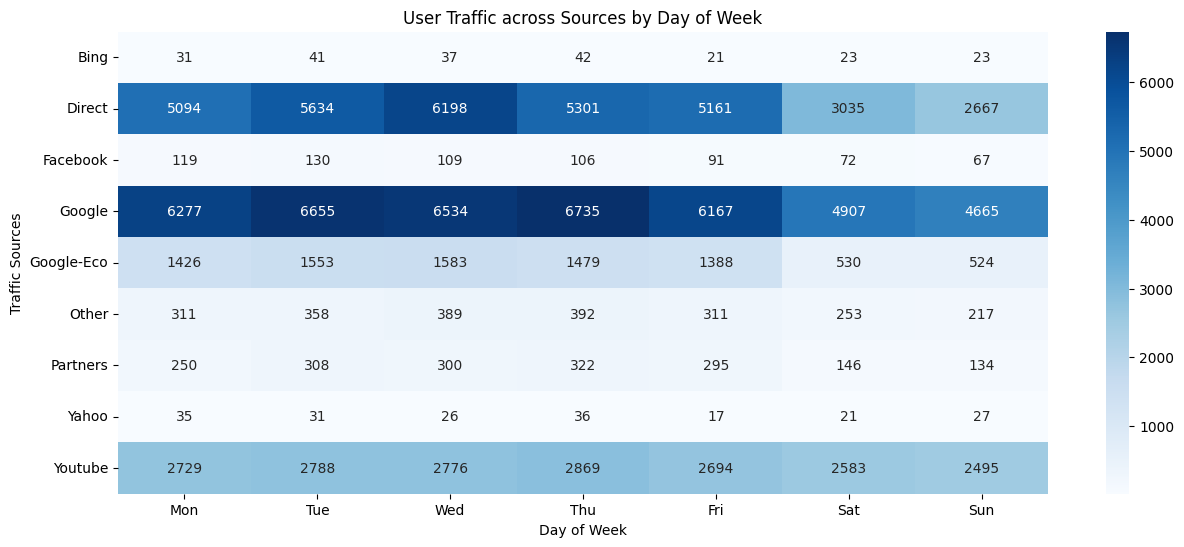

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
    data=pd.crosstab(index=train_df_copy['trafficSource'], columns=train_df_copy['day_of_week'].sort_values().apply(lambda x: day_labels[x])).loc[:, day_labels],
    annot=True, fmt='d', cmap='Blues'
)
ax.set_title('User Traffic across Sources by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Traffic Sources')
plt.show()

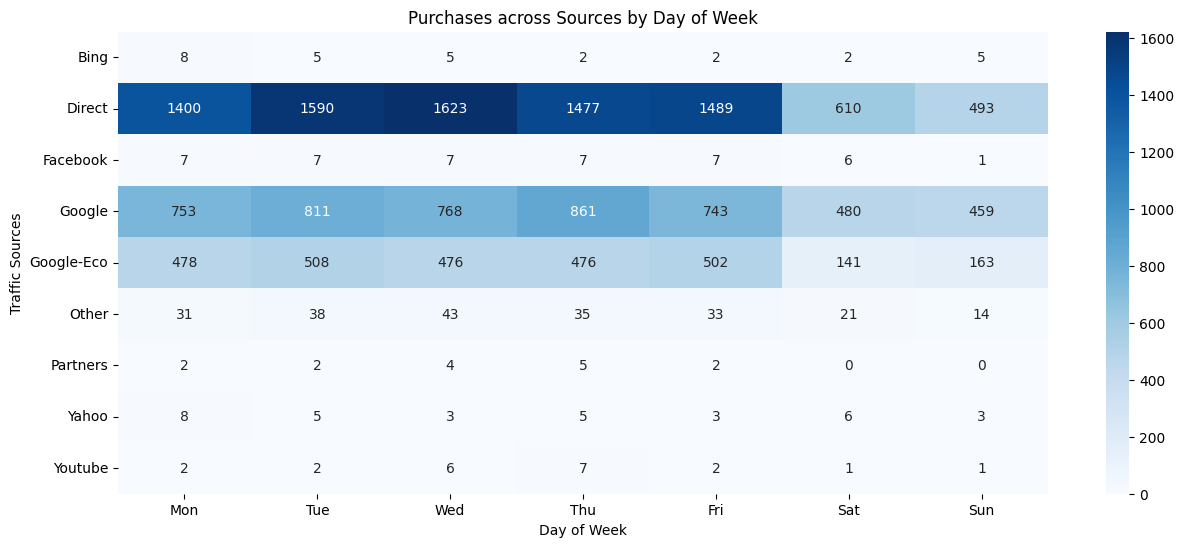

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
    data=pd.crosstab(index=train_df_copy.loc[train_df_copy['purchaseValue']>0, 'trafficSource'], columns=train_df_copy['day_of_week'].sort_values().apply(lambda x: day_labels[x])).loc[:, day_labels],
    annot=True, fmt='d', cmap='Blues'
)
ax.set_title('Purchases across Sources by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Traffic Sources')
plt.show()

#### trafficSource.medium

In [ ]:
train_df_copy['trafficSource.medium'].isna().sum()

0

In [ ]:
train_df_copy['trafficSource.medium'].value_counts()

trafficSource.medium
organic      38500
(none)       33090
referral     29459
cpc           4026
affiliate     1753
cpm            701
(not set)        9
Name: count, dtype: int64

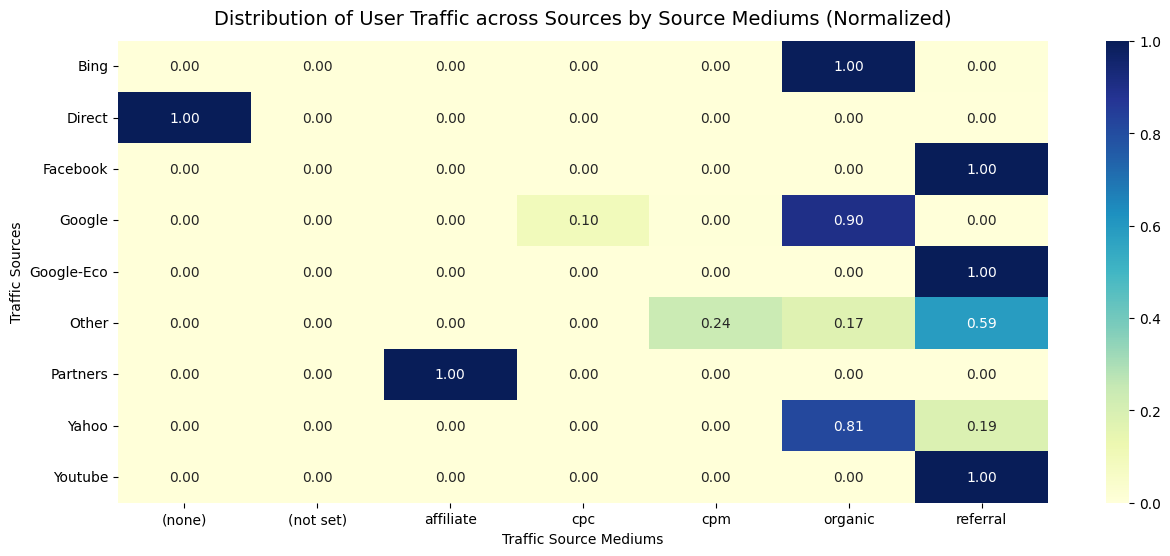

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(
        pd.crosstab(train_df_copy['trafficSource'], train_df_copy['trafficSource.medium'], normalize='index'),
        annot=True, fmt='0.2f', cmap='YlGnBu'
    )

ax.set_title('Distribution of User Traffic across Sources by Source Mediums (Normalized)', fontsize=14, pad=12)
ax.set_xlabel('Traffic Source Mediums')
ax.set_ylabel('Traffic Sources')
ax.set_yticks(ticks=ax.get_yticks())
ax.set_yticklabels(labels=ax.get_yticklabels(), rotation=0)
plt.show()

#### userChannel

In [ ]:
train_df_copy['userChannel'].isna().sum()

0

In [ ]:
train_df_copy['userChannel'].value_counts()

userChannel
Organic Search    44248
Social            20434
Referral          18398
Direct            17434
Paid Search        3062
Display            2200
Affiliates         1753
(Other)               9
Name: count, dtype: int64

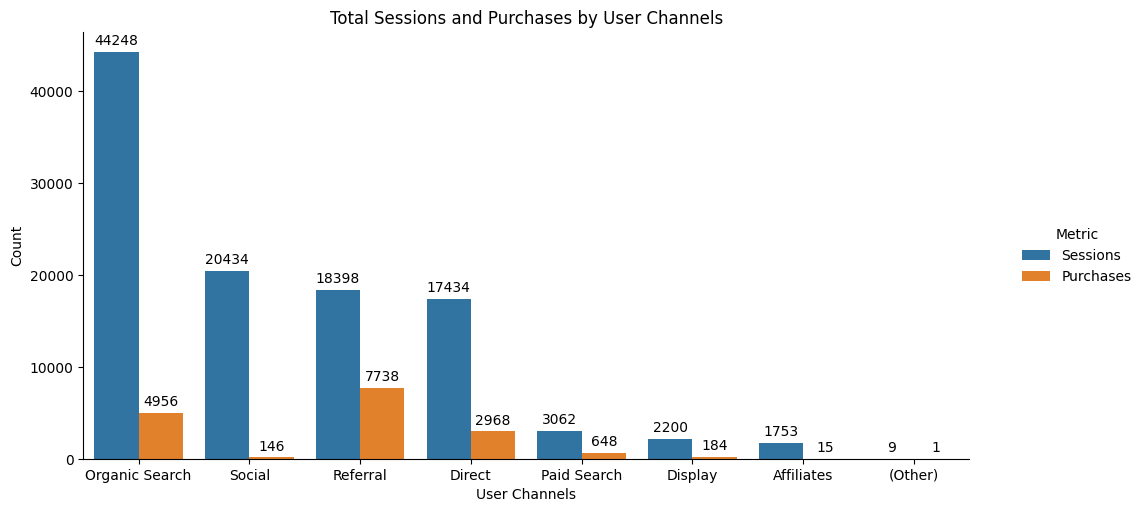

In [ ]:
x = (
    train_df_copy
    .groupby(['userChannel'])['purchaseValue']
    .agg([('total_sessions', 'count'), ('total_purchases', lambda x: x[x>0].count())])
    .sort_values(['total_sessions'], ascending=False)
    .reset_index()
    .melt(id_vars=['userChannel'], value_vars=['total_sessions', 'total_purchases'], var_name='metric', value_name='count')
)

g = sns.catplot(data=x, kind='bar', x='userChannel', y='count', hue='metric', height=5, aspect=2)
g.fig.axes[0].set_title('Total Sessions and Purchases by User Channels')
g.fig.axes[0].set_xlabel('User Channels')
g.fig.axes[0].set_ylabel('Count')

for bar in g.fig.axes[0].patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    g.fig.axes[0].annotate(
        text=f'{int(height)}',
        xy=(x, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom'
    )

g._legend.set_title('Metric')
for t, label in zip(g._legend.texts, ['Sessions', 'Purchases']):
    t.set_text(label)

plt.show()

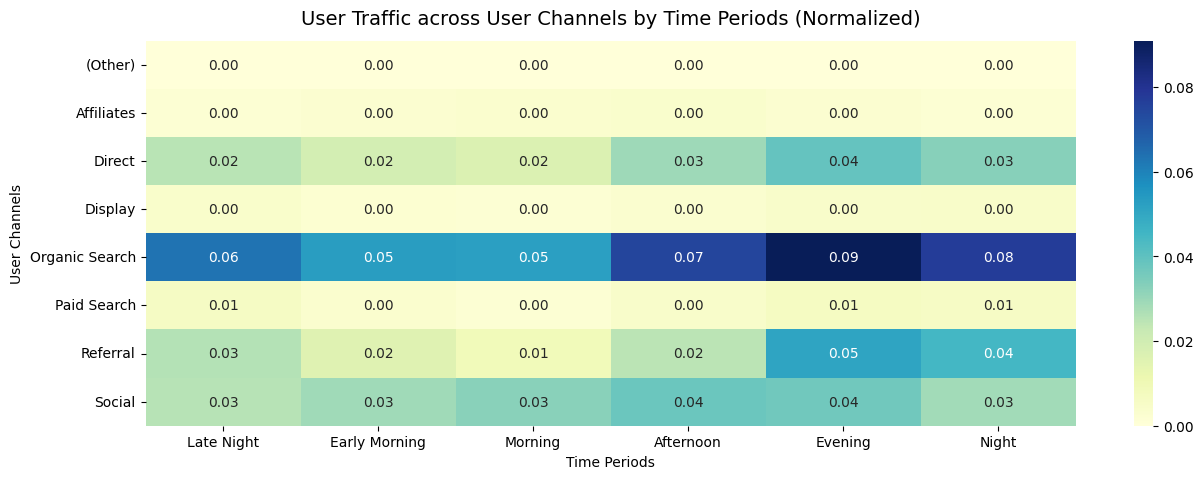

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.heatmap(
    pd.crosstab(train_df_copy['userChannel'], train_df_copy['time_category'], normalize='all'),
    annot=True, fmt='0.2f', cmap='YlGnBu'
)

ax.set_title('User Traffic across User Channels by Time Periods (Normalized)', fontsize=14, pad=12)
ax.set_ylabel('User Channels')
ax.set_xlabel('Time Periods')
ax.set_yticks(ticks=ax.get_yticks())
ax.set_yticklabels(labels=ax.get_yticklabels(), rotation=0)
plt.show()

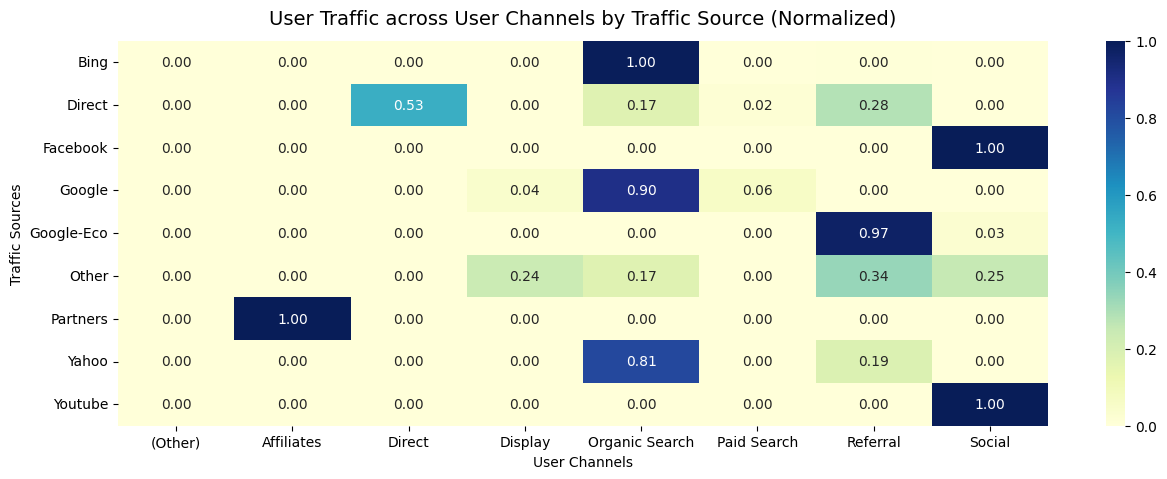

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

sns.heatmap(
    pd.crosstab(train_df_copy['trafficSource'], train_df_copy['userChannel'], normalize='index'),
    annot=True, fmt='0.2f', cmap='YlGnBu', ax=ax1
)

ax1.set_title('User Traffic across User Channels by Traffic Source (Normalized)', fontsize=14, pad=12)
ax1.set_xlabel('User Channels')
ax1.set_ylabel('Traffic Sources')
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

plt.show()

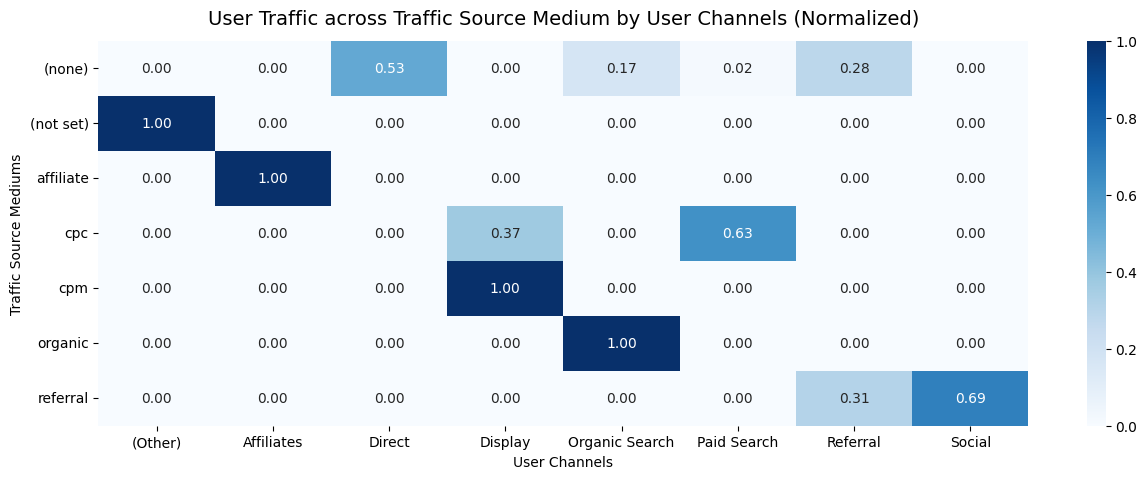

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.heatmap(
    pd.crosstab(train_df_copy['trafficSource.medium'], train_df_copy['userChannel'], normalize='index'),
    annot=True, fmt='0.2f', cmap='Blues'
)

ax.set_title('User Traffic across Traffic Source Medium by User Channels (Normalized)', fontsize=14, pad=12)
ax.set_xlabel('User Channels')
ax.set_ylabel('Traffic Source Mediums')
ax.set_yticks(ticks=ax.get_yticks())
ax.set_yticklabels(labels=ax.get_yticklabels(), rotation=0)
plt.show()

#### deviceType, os, browser

In [ ]:
train_df_copy[['deviceType', 'os', 'browser']].isna().sum()

deviceType    0
os            0
browser       0
dtype: int64

In [ ]:
train_df_copy['deviceType'].value_counts(normalize=True).mul(100)

deviceType
desktop    73.400100
mobile     23.301531
tablet      3.298369
Name: proportion, dtype: float64

In [ ]:
train_df_copy['os'].value_counts(normalize=True).mul(100).head()

os
Windows      34.627759
Macintosh    30.873738
Android      14.353066
iOS          11.409920
Other         4.516543
Name: proportion, dtype: float64

In [ ]:
train_df_copy['browser'].value_counts(normalize=True).mul(100).head()

browser
Chrome     71.708605
Safari     17.176254
Other       7.529431
Firefox     3.585709
Name: proportion, dtype: float64

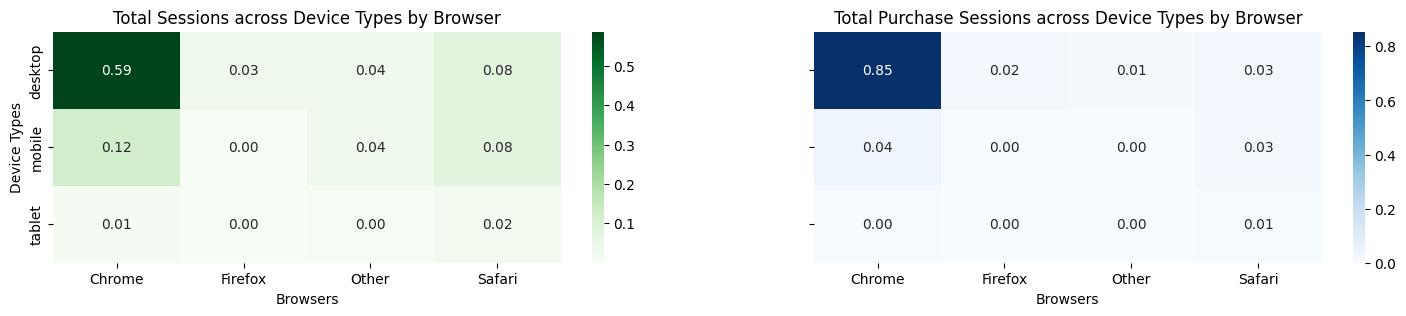

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 3), sharey=True)

sns.heatmap(pd.crosstab(train_df_copy['deviceType'], train_df_copy['browser'], normalize='all'), annot=True, fmt='.2f', ax=ax1, cmap='Greens')
ax1.set_title('Total Sessions across Device Types by Browser')
ax1.set_xlabel('Browsers')
ax1.set_ylabel('Device Types')

sns.heatmap(pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'deviceType'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0,'browser'], normalize='all'), annot=True, fmt='.2f', ax=ax2, cmap='Blues')
ax2.set_title('Total Purchase Sessions across Device Types by Browser')
ax2.set_xlabel('Browsers')
ax2.set_ylabel('')

plt.show()

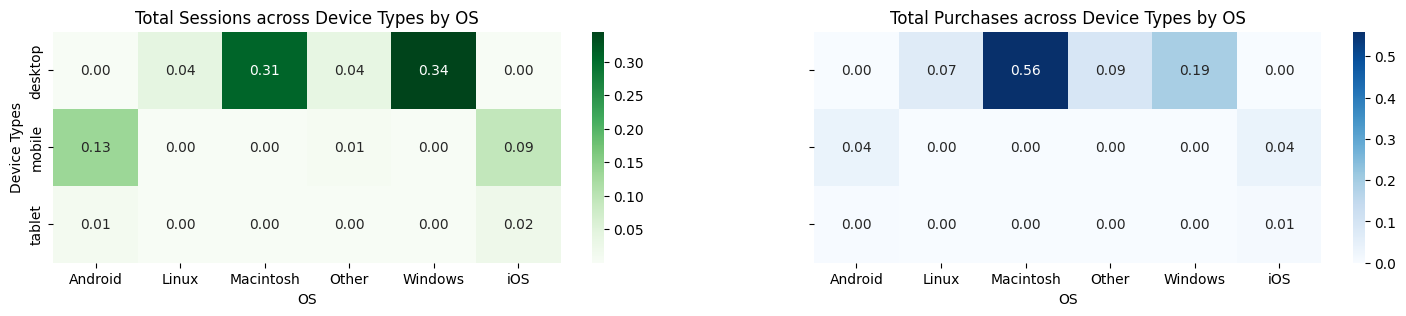

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 3), sharey=True)

sns.heatmap(pd.crosstab(train_df_copy['deviceType'], train_df_copy['os'], normalize='all'), annot=True, fmt='.2f', ax=ax1, cmap='Greens')
ax1.set_title('Total Sessions across Device Types by OS')
ax1.set_xlabel('OS')
ax1.set_ylabel('Device Types')

sns.heatmap(pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'deviceType'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0,'os'], normalize='all'), annot=True, fmt='.2f', ax=ax2 , cmap='Blues')
ax2.set_title('Total Purchases across Device Types by OS')
ax2.set_xlabel('OS')
ax2.set_ylabel('')

plt.show()

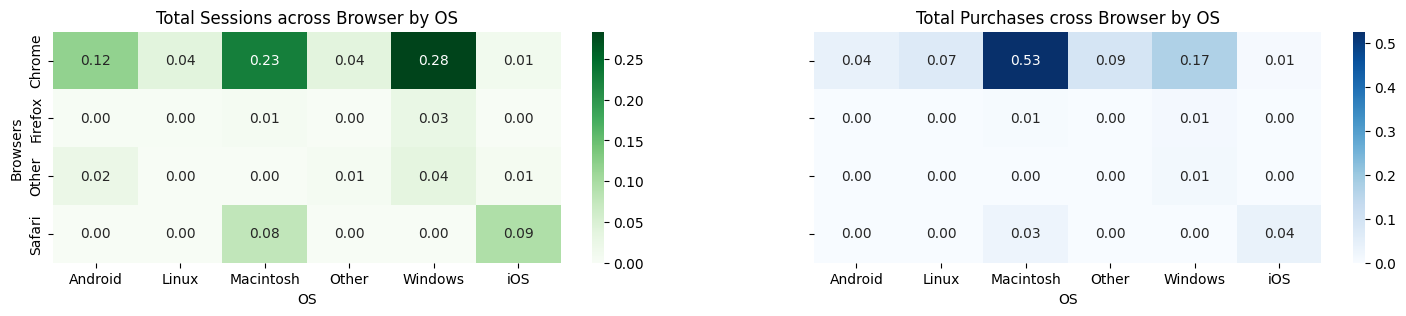

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 3), sharey=True)

sns.heatmap(pd.crosstab(train_df_copy['browser'], train_df_copy['os'], normalize='all'), annot=True, fmt='.2f', ax=ax1, cmap='Greens')
ax1.set_title('Total Sessions across Browser by OS')
ax1.set_xlabel('OS')
ax1.set_ylabel('Browsers')

sns.heatmap(
    pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'browser'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0,'os'], normalize='all'),
    annot=True, fmt='.2f', ax=ax2, cmap='Blues'
)
ax2.set_title('Total Purchases cross Browser by OS')
ax2.set_xlabel('OS')
ax2.set_ylabel('')

plt.show()

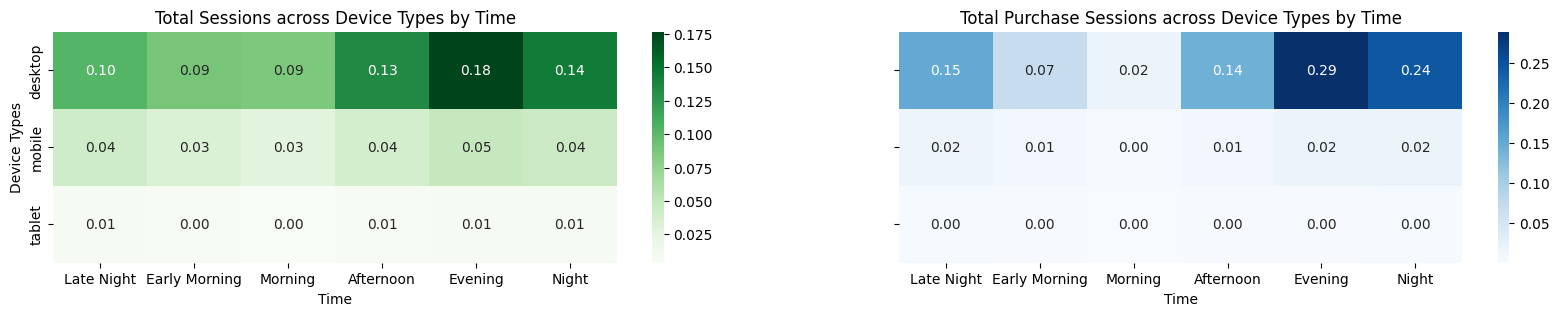

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3), sharey=True)

sns.heatmap(pd.crosstab(train_df_copy['deviceType'], train_df_copy['time_category'], normalize='all'), annot=True, fmt='.2f', ax=ax1, cmap='Greens')
ax1.set_title('Total Sessions across Device Types by Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Device Types')

sns.heatmap(
    pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'deviceType'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0,'time_category'], normalize='all'),
    annot=True, fmt='.2f', ax=ax2, cmap='Blues'
)
ax2.set_title('Total Purchase Sessions across Device Types by Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('')

plt.show()

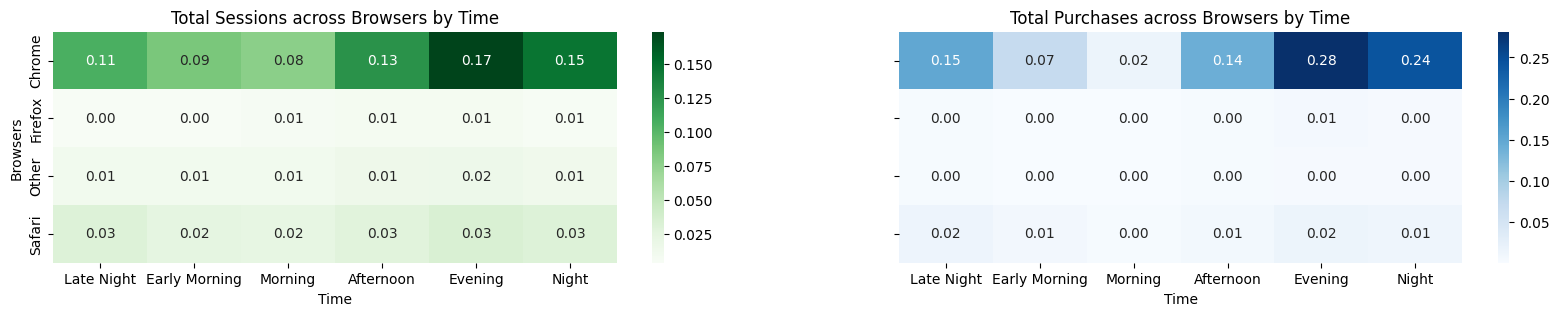

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3), sharey=True)

sns.heatmap(pd.crosstab(train_df_copy['browser'], train_df_copy['time_category'], normalize='all'), annot=True, fmt='.2f', ax=ax1, cmap='Greens')
ax1.set_title('Total Sessions across Browsers by Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Browsers')

sns.heatmap(
    pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'browser'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0,'time_category'], normalize='all'),
    annot=True, fmt='.2f', ax=ax2, cmap='Blues'
)
ax2.set_title('Total Purchases across Browsers by Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('')

plt.show()

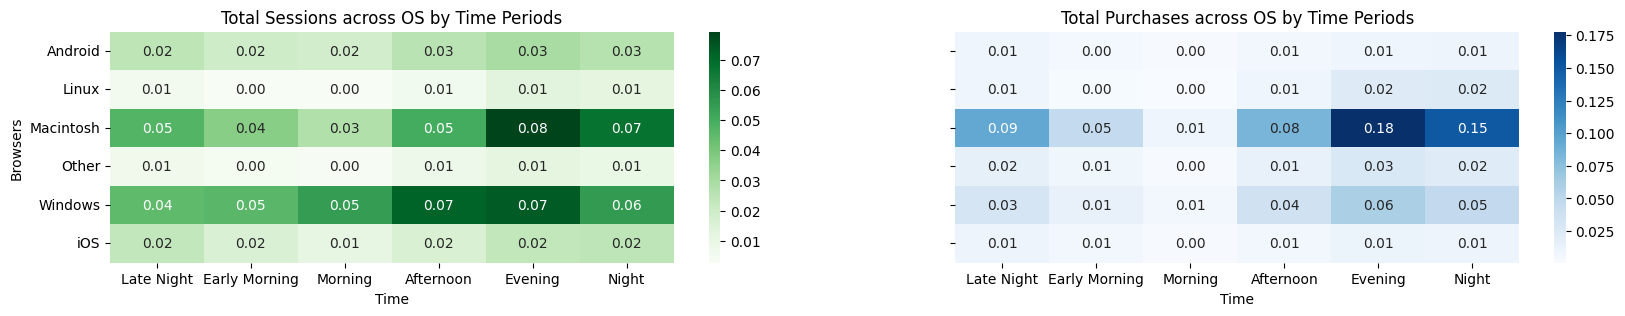

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3), sharey=True)

sns.heatmap(pd.crosstab(train_df_copy['os'], train_df_copy['time_category'], normalize='all'), annot=True, fmt='.2f', ax=ax1, cmap='Greens')
ax1.set_title('Total Sessions across OS by Time Periods')
ax1.set_xlabel('Time')
ax1.set_ylabel('Browsers')

sns.heatmap(
    pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'os'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0,'time_category'], normalize='all'),
    annot=True, fmt='.2f', ax=ax2, cmap='Blues'
)
ax2.set_title('Total Purchases across OS by Time Periods')
ax2.set_xlabel('Time')
ax2.set_ylabel('')

plt.show()

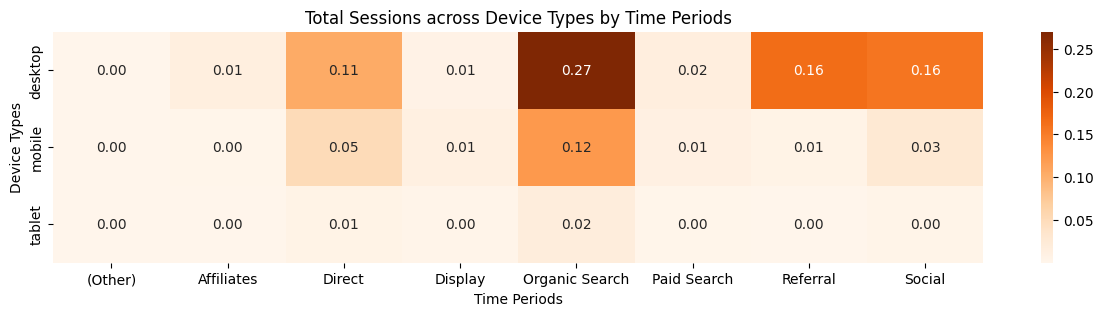

In [ ]:
plt.figure(figsize=(15, 3))

sns.heatmap(pd.crosstab(train_df_copy['deviceType'], train_df_copy['userChannel'], normalize='all'), annot=True, fmt='.2f', cmap='Oranges')
plt.title('Total Sessions across Device Types by Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Device Types')


plt.show()

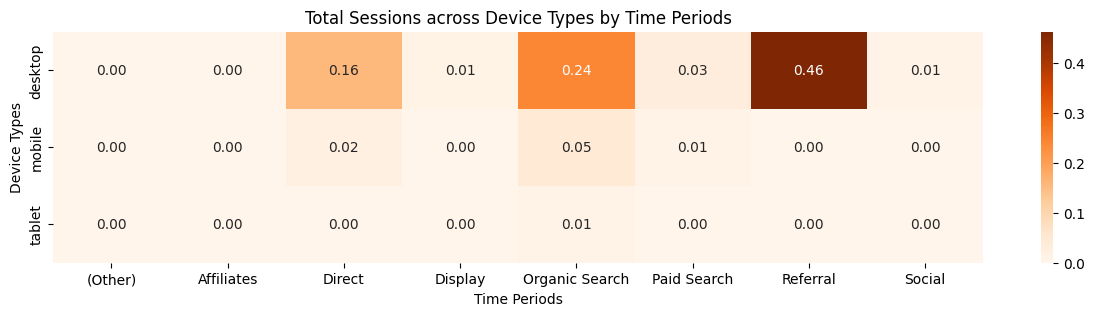

In [ ]:
plt.figure(figsize=(15, 3))

sns.heatmap(pd.crosstab(train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'deviceType'], train_df_copy.loc[lambda _df: _df['purchaseValue']>0, 'userChannel'], normalize='all'), annot=True, fmt='.2f', cmap='Oranges')
plt.title('Total Sessions across Device Types by Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Device Types')


plt.show()

#### trafficSource.isTrueDirect

In [ ]:
train_df_copy['trafficSource.isTrueDirect'].isna().sum()

69438

In [ ]:
train_df_copy['trafficSource.isTrueDirect'].value_counts(dropna=False, normalize=True).mul(100)

trafficSource.isTrueDirect
NaN     64.570663
True    35.429337
Name: proportion, dtype: float64

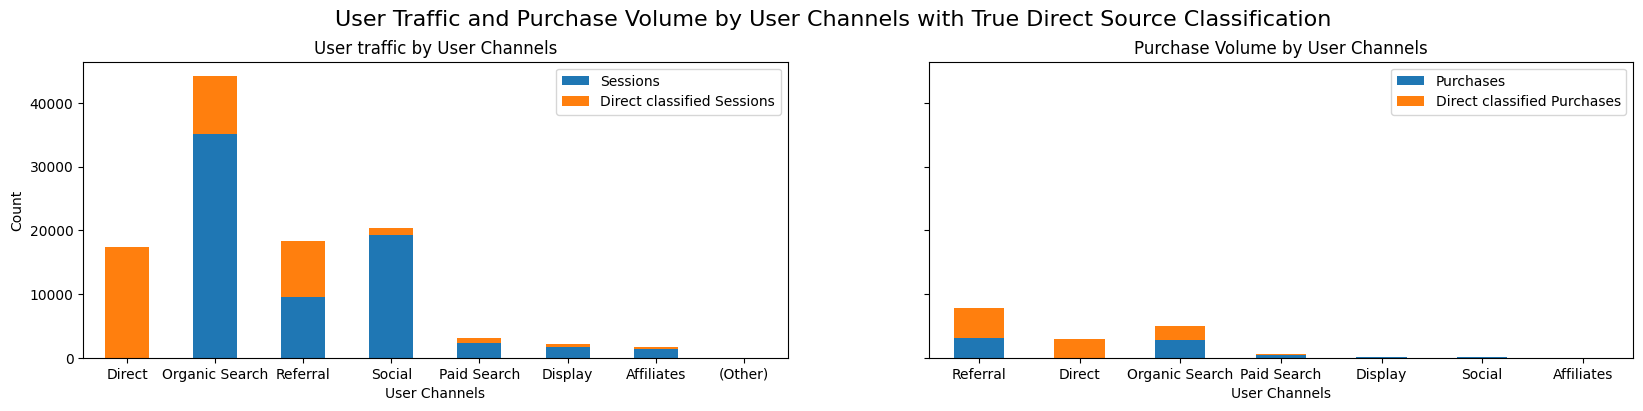

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
fig.suptitle('User Traffic and Purchase Volume by User Channels with True Direct Source Classification', fontsize=16)

ax1 = plt.subplot(1, 2, 1)
pd.merge(
    train_df_copy.loc[lambda _df: _df['trafficSource.isTrueDirect'].isna(), 'userChannel'].value_counts().reset_index(name='direct'),
    train_df_copy.loc[lambda _df: ~_df['trafficSource.isTrueDirect'].isna(), 'userChannel'].value_counts().reset_index(name='not-direct'),
    how='right',
).plot(kind='bar', x='userChannel', stacked=True, ax=ax1)

ax1.set_title('User traffic by User Channels')
ax1.set_xlabel('User Channels')
ax1.set_ylabel('Count')
ax1.legend(labels=['Sessions', 'Direct classified Sessions'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)


ax2 = plt.subplot(1, 2, 2)
pd.merge(
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0].loc[lambda _df: _df['trafficSource.isTrueDirect'].isna(), 'userChannel'].value_counts().reset_index(name='direct'),
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0].loc[lambda _df: ~_df['trafficSource.isTrueDirect'].isna(), 'userChannel'].value_counts().reset_index(name='not-direct'),
    how='right'
).plot(kind='bar', x='userChannel', stacked=True, ax=ax2)

ax2.set_title('Purchase Volume by User Channels')
ax2.set_xlabel('User Channels')
ax2.legend(labels=['Purchases', 'Direct classified Purchases'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.subplots_adjust(top=0.85)
plt.show()

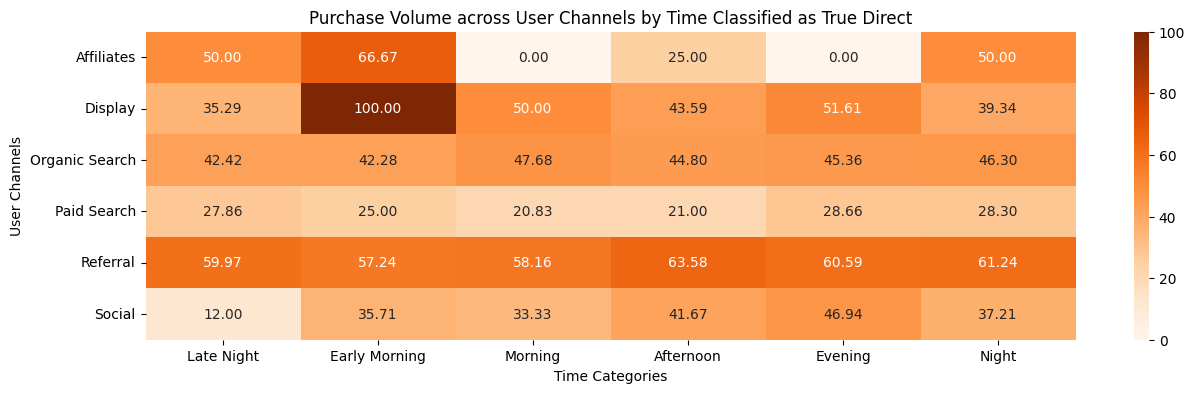

In [ ]:
p = (
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0]
    .groupby(['userChannel', 'time_category'])['trafficSource.isTrueDirect']
    .agg(lambda x: (x.count()/train_df_copy.loc[x.index].shape[0])*100)
    .unstack()
    .fillna(0)
    .loc[lambda _df: ~_df.index.get_level_values(0).isin(['Direct', '(Other)'])]
)

plt.figure(figsize=(15, 4))
ax = sns.heatmap(p, annot=True, fmt='.2f', cmap='Oranges')
ax.set_title('Purchase Volume across User Channels by Time Classified as True Direct')
ax.set_xlabel('Time Categories')
ax.set_ylabel('User Channels')
plt.show()

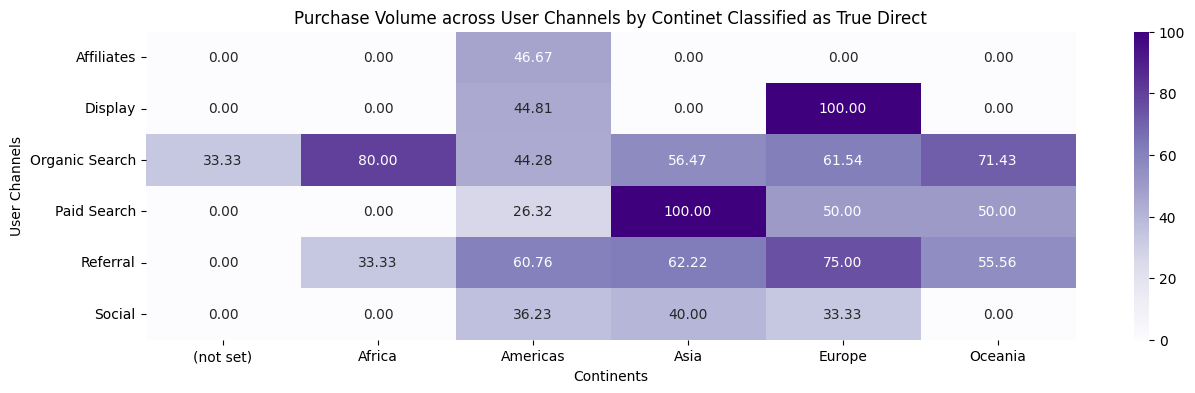

In [ ]:
p = (
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0]
    .groupby(['userChannel', 'geoNetwork.continent'])['trafficSource.isTrueDirect']
    .agg(lambda x: (x.count()/train_df_copy.loc[x.index].shape[0])*100)
    .unstack()
    .fillna(0)
    .loc[lambda _df: ~_df.index.get_level_values(0).isin(['Direct', '(Other)'])]
)

plt.figure(figsize=(15, 4))
ax = sns.heatmap(p, annot=True, fmt='.2f', cmap='Purples')
ax.set_title('Purchase Volume across User Channels by Continet Classified as True Direct')
ax.set_xlabel('Continents')
ax.set_ylabel('User Channels')
plt.show()

#### geoNetwork.city, geoNetwork.metro

In [ ]:
train_df_copy['geoNetwork.city'].nunique()

695

In [ ]:
train_df_copy['geoNetwork.city'].value_counts().head(10)

geoNetwork.city
not available in demo dataset    56571
Mountain View                     5855
New York                          4648
(not set)                         3521
San Francisco                     2988
Sunnyvale                         2086
San Jose                          1384
Chicago                           1340
Los Angeles                       1289
London                            1281
Name: count, dtype: int64

In [ ]:
train_df_copy['geoNetwork.metro'].value_counts().head(10)

geoNetwork.metro
not available in demo dataset        56571
(not set)                            21202
San Francisco-Oakland-San Jose CA    14092
New York NY                           4718
Los Angeles CA                        1533
Chicago IL                            1350
London                                1286
Seattle-Tacoma WA                     1256
Austin TX                              679
Boston MA-Manchester NH                506
Name: count, dtype: int64

In [ ]:
train_df_copy['geoNetwork.metro'].nunique()

104

#### geoNetwork.networkDomain, geoCluster, gclIdPresent

In [ ]:
train_df_copy['geoNetwork.networkDomain'].value_counts()

geoNetwork.networkDomain
domain1    35932
domain2    35834
domain3    35772
Name: count, dtype: int64

In [ ]:
train_df_copy['geoCluster'].value_counts()

geoCluster
Region_5    21606
Region_4    21586
Region_3    21537
Region_2    21519
Region_1    21290
Name: count, dtype: int64

In [ ]:
train_df_copy['gclIdPresent'].value_counts()

gclIdPresent
0    103574
1      3964
Name: count, dtype: int64

#### trafficSource.referralPath

In [ ]:
train_df_copy['trafficSource.referralPath'].isna().sum()

68710

In [ ]:
train_df_copy['trafficSource.referralPath'].value_counts(dropna=False, normalize=True).mul(100).head()

trafficSource.referralPath
NaN                63.893693
/                  13.553349
/yt/about/          4.757388
/analytics/web/     1.503655
/yt/about/tr/       0.960591
Name: proportion, dtype: float64


#### trafficSource.campaign

In [ ]:
train_df_copy['trafficSource.campaign'].isna().sum()

0

In [ ]:
train_df_copy['trafficSource.campaign'].value_counts().head()

trafficSource.campaign
(not set)                                                 102071
Data Share Promo                                            1753
AW - Dynamic Search Ads Whole Site                          1338
1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS       855
AW - Accessories                                             671
Name: count, dtype: int64

In [ ]:
x = (
    train_df_copy
    .loc[train_df_copy['trafficSource.campaign'] != '(not set)', ['trafficSource', 'userChannel']]
    .value_counts()
    .reset_index(name='total_sessions')
)

y = (
    train_df_copy.loc[lambda _df: _df['purchaseValue']>0]
    .loc[train_df_copy['trafficSource.campaign'] != '(not set)', ['trafficSource', 'userChannel']]
    .value_counts()
    .reset_index(name='total_purchases')
)

pd.merge(x, y, how='outer', left_on=['trafficSource', 'userChannel'], right_on=['trafficSource', 'userChannel'])

,trafficSource,userChannel,total_sessions,total_purchases
0,Google,Display,1497,5
1,Google,Paid Search,2217,511
2,Partners,Affiliates,1753,15


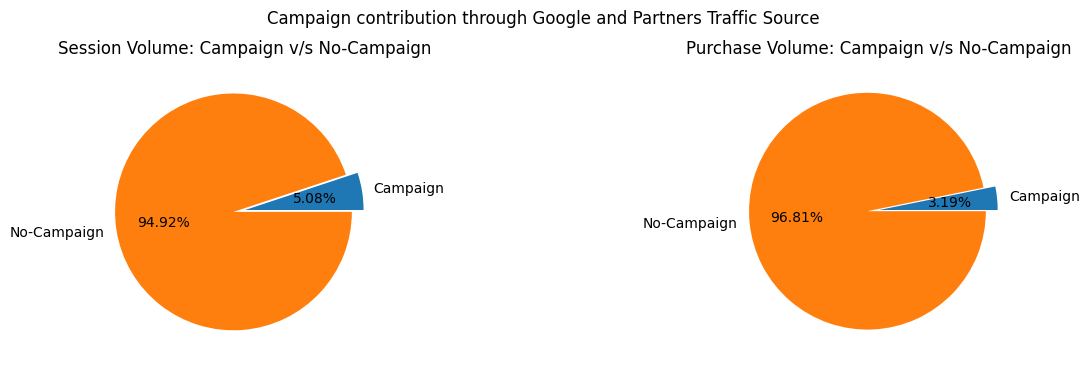

In [ ]:
campaign_sessions = train_df_copy.loc[train_df_copy['trafficSource.campaign'] != '(not set)'].shape[0]
no_campaign_sessions = train_df_copy.shape[0] - campaign_sessions

campaign_purchases = train_df_copy.loc[(train_df_copy['trafficSource.campaign'] != '(not set)') & train_df_copy['purchaseValue']>0].shape[0]
no_campaign_purchases = train_df_copy.loc[train_df_copy['purchaseValue']>0].shape[0] - campaign_purchases

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Campaign contribution through Google and Partners Traffic Source')

ax1.pie(
    x=[campaign_sessions, no_campaign_sessions],
    autopct='%.2f%%',
    labels = ['Campaign', 'No-Campaign'],
    explode=(0.0, 0.1)
)
ax1.set_title('Session Volume: Campaign v/s No-Campaign')

ax2.pie(
    x=[campaign_purchases, no_campaign_purchases],
    autopct='%.2f%%',
    labels = ['Campaign', 'No-Campaign'],
    explode=(0.0, 0.1)
)
ax2.set_title('Purchase Volume: Campaign v/s No-Campaign')

plt.subplots_adjust(top=0.85)
plt.show()

#### trafficSource.* columns

- `trafficSource.adContent`, `trafficSource.keyword`, `trafficSource.adwordsClickInfo.slot`
- `trafficSource.adwordsClickInfo.isVideoAd`, `trafficSource.adwordsClickInfo.adNetworkType`, `trafficSource.adwordsClickInfo.page`

In [ ]:
train_df_copy['trafficSource.adContent'].isna().sum()

104689

In [ ]:
train_df_copy['trafficSource.adContent'].value_counts().head()

trafficSource.adContent
Google Merchandise Store          1410
Google Merchandise Collection      562
Display Ad created 3/11/14         131
Placement Accessores 300 x 250     114
Google Online Store                 99
Name: count, dtype: int64

In [ ]:
train_df_copy['trafficSource.keyword'].isna().sum()

65765

In [ ]:
train_df_copy['trafficSource.keyword'].value_counts().head()

trafficSource.keyword
(not provided)                     36952
6qEhsCssdK0z36ri                    1029
(User vertical targeting)            923
(automatic matching)                 670
(Remarketing/Content targeting)      309
Name: count, dtype: int64

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.isVideoAd'].isna().sum()

103586

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.isVideoAd'].value_counts()

trafficSource.adwordsClickInfo.isVideoAd
False    3952
Name: count, dtype: int64

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.adNetworkType'].isna().sum()

103586

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.adNetworkType'].value_counts()

trafficSource.adwordsClickInfo.adNetworkType
Google Search    2455
Content          1497
Name: count, dtype: int64

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.page'].isna().sum()

103586

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.page'].value_counts()

trafficSource.adwordsClickInfo.page
1.0    3887
2.0      50
3.0      12
4.0       2
5.0       1
Name: count, dtype: int64

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.slot'].isna().sum()

103586

In [ ]:
train_df_copy['trafficSource.adwordsClickInfo.slot'].value_counts(normalize=True, dropna=False) #3%

trafficSource.adwordsClickInfo.slot
NaN                       0.963250
Top                       0.022271
RHS                       0.014451
Google Display Network    0.000028
Name: proportion, dtype: float64

## Data Preprocessing and Model Building

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Train and Validation data split

In [ ]:
train_subset, val_subset = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
train_subset.shape

(92818, 52)

In [ ]:
val_subset.shape

(23205, 52)

#### helper functions for preparing data before preprocessing

- clean data
- drop duplicates
- feature extraction such as datetime features
- feature engg
- apply aggregation

In [ ]:
def drop_missing_val_and_single_val_cols(data, missing=0.6):
    df = data.copy(deep=True)

    miss_val_pct_col_ser = df.isna().mean()
    nunq_val_col_ser = df[df.columns[~df.isna().sum().gt(0)]].nunique()

    miss_val_cols = miss_val_pct_col_ser[miss_val_pct_col_ser.gt(missing)].index.tolist()
    single_val_cols = nunq_val_col_ser[nunq_val_col_ser.eq(1)].index.tolist()

    cols_to_drop = miss_val_cols + single_val_cols
    return df.drop(columns=cols_to_drop)

In [ ]:
def clean_and_fill_missing_value(data):
    df = data.copy(deep=True)

    # clean
    df['totalHits'] = df['totalHits'].astype(int)
    df['device.isMobile'] = df['device.isMobile'].astype(int)

    df = df.replace(
        ['not available in demo dataset', '(not set)', '(not provided)', '(direct)', '(none)', '(Other)'],
        ['unknown', 'not set', 'not provided', 'direct', 'none', 'Other']
    )

    # impute
    df['pageViews'] = df['pageViews'].fillna(1).astype(int)
    df['new_visits'] = df['new_visits'].fillna(0).astype(int)
    df['totals.bounces'] = df['totals.bounces'].fillna(0).astype(int)

    return df

In [ ]:
def datetime_features_extraction(data):
    df = data.copy(deep=True)

    # convert into datetime
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['sessionStart'] = pd.to_datetime(df['sessionStart'], unit='s')

    # new features
    df['year'] = df['date'].dt.year.astype('str')
    df['month'] = df['date'].dt.month
    df['date_of_month'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek

    return df.drop(columns=['sessionStart'])

In [ ]:
def feature_engg(data):
    df = data.copy(deep=True)

    # new features
    df['total_engagements'] = (df['totalHits'] - df['pageViews']).astype(int)
    df['engagement_per_page'] = df['total_engagements'] / df['pageViews']

    # feature interaction
    df['geoNetwork.region'] = df['locationCountry'] + '__' + df['geoNetwork.region']
    df['geoNetwork.city'] = df['geoNetwork.region'] + '__' + df['geoNetwork.city']
    df['geoNetwork.metro'] = df['geoNetwork.city'] + '__' + df['geoNetwork.metro']

    return df

In [ ]:
def country_agg(data):
    agg = data.groupby(['locationCountry']).agg({
        'userId': ['nunique'],
        'totalHits': ['sum', 'max', 'mean', 'std'],
        'pageViews': ['sum', 'max', 'mean', 'std'],
        'total_engagements': ['sum', 'max', 'mean', 'std'],
        'date': ['nunique', ('avg_session_days', lambda x: x.sort_values().pipe(
              lambda y: (y-y.shift()).dt.days.mean()
        ))],
        'new_visits': ['sum', 'mean'],
        'totals.bounces': ['sum', 'mean'],
        'device.isMobile': ['sum', 'mean'],
        'geoNetwork.region': ['nunique'],
        'geoNetwork.city': ['nunique']
    }).fillna(0)

    agg.columns = [
        f"{col[0]}__{col[1]}_country" if col[1] else col[0]
        for col in agg.columns
    ]

    return agg

In [ ]:
def user_agg(data):
    agg = data.groupby(['userId']).agg({
        'sessionNumber': ['max'],
        'pageViews':  ['mean', 'max', 'std'],
        'totalHits':  ['mean', 'max', 'std'],
        'total_engagements': ['mean', 'max', 'std'],
        'totals.bounces': ['sum', 'mean'],
        'date': [('active_days', 'nunique')],
    }).fillna(0)

    agg.columns = [
        f"{col[0]}__{col[1]}_user" if col[1] else col[0]
        for col in agg.columns
    ]

    return agg

In [ ]:
def prepare_data_for_preprocessing(data, is_train=True, apply_user_agg=False):
    df = data.copy(deep=True)

    if is_train:
        df = df.drop_duplicates()

    df = drop_missing_val_and_single_val_cols(df)
    df = clean_and_fill_missing_value(df)
    df = datetime_features_extraction(df)
    df = feature_engg(df)

    df = pd.merge(df, country_agg(df), how='left', left_on=['locationCountry'], right_index=True)

    if apply_user_agg:
        df = pd.merge(df, user_agg(df), how='left', left_on=['userId'], right_index=True)

    return df.drop(columns=['userId', 'sessionId', 'date'])

#### Train subset data preparation

In [ ]:
train_subset_prepared = prepare_data_for_preprocessing(train_subset)

X_train = train_subset_prepared.drop(columns=['purchaseValue'])
y_train = train_subset_prepared['purchaseValue']

X_train.shape, y_train.shape

((92667, 51), (92667,))

#### Validation data prepration

In [ ]:
val_subet_prepared = prepare_data_for_preprocessing(val_subset, is_train=False)

X_val = val_subet_prepared.drop(columns=['purchaseValue'])
y_val = val_subet_prepared['purchaseValue']

X_val.shape, y_val.shape

((23205, 51), (23205,))

#### Test Data prepartion for submission

In [ ]:
test_df_prepared = prepare_data_for_preprocessing(test_df, is_train=False).reindex(columns=X_train.columns)

test_df_prepared.shape

(29006, 51)

#### Whole Data for Label Encoding

In [ ]:
full_df = pd.concat([X_train, X_val, test_df_prepared])

full_df.shape

(144878, 51)

### Data Preprocessing Pipeline

In [ ]:
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}
        self._output = None

    def fit(self, X, y=None):
        X = X.copy(deep=True)

        if self.columns is None:
            self.columns = X.select_dtypes(include=['object']).columns.tolist()

        for col in self.columns:
            le = LabelEncoder()
            X[col] = X[col].astype(str).fillna("missing")
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X = X.copy(deep=True)

        for col in self.columns:
            le = self.encoders[col]
            X[col] = X[col].astype(str).fillna("missing")
            X[col] = le.transform(X[col])
        return X

    def set_output(self, transform=None):
        self._output = transform
        return self

In [ ]:
class Preprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, scale_num=False, handle_unknown='ignore'):
        self.handle_unknown = handle_unknown
        self.scale_num = scale_num
        self.column_transformer = None
        self.label_cols = [
            'trafficSource', 'trafficSource.medium', 'userChannel', 'geoNetwork.continent',
            'geoNetwork.subContinent', 'os', 'browser', 'trafficSource.campaign', 'locationCountry',
            'geoNetwork.region', 'geoNetwork.city', 'geoNetwork.metro'
        ]
        self.ohe_cols = ['geoCluster', 'deviceType', 'geoNetwork.networkDomain', 'year']
        self.num_cols = None

    def fit(self, X, y=None):
        X_copy = X.copy(deep=True)

        self.num_cols = X_copy.select_dtypes(include=['int', 'float']).columns.tolist()

        ohe_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('ohe_encoder', OneHotEncoder(sparse_output=False, handle_unknown=self.handle_unknown))
        ])

        label_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('label_encoder', MultiColumnLabelEncoder(columns=self.label_cols))
        ])

        transformers = [
            ('ohe', ohe_pipeline, self.ohe_cols),
            ('label', label_pipeline, self.label_cols)
        ]

        if self.scale_num:
            num_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())
            ])
        else:
            num_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='median'))
            ])

        transformers.append(('num', num_pipeline, self.num_cols))

        self.column_transformer = ColumnTransformer(
            transformers,
            remainder='passthrough',
            n_jobs=-1,
            verbose_feature_names_out=False
        )

        self.column_transformer.set_output(transform='pandas')
        self.column_transformer.fit(X_copy)
        return self

    def transform(self, X):
        return self.column_transformer.transform(X)


In [ ]:
data_pre_processsing_pipe = Preprocessor(handle_unknown='ignore')

data_pre_processsing_pipe.fit(full_df)

Preprocessor()

#### X_train preprocessing

In [ ]:
X_train_preprocessed = data_pre_processsing_pipe.transform(X_train)

X_train_preprocessed.shape, y_train.shape

((92667, 61), (92667,))

#### X_val preprocessing

In [ ]:
X_val_preprocessed = data_pre_processsing_pipe.transform(X_val)

X_val_preprocessed.shape, y_val.shape

((23205, 61), (23205,))

### Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
from time import time

In [ ]:
def adjusted_r2_score(y_true, y_pred, n_features):
  if y_true.shape[0] != y_pred.shape[0]:
    raise Exception('shape not same')

  n = y_true.shape[0]
  y_mean = np.mean(y_true)

  SST = np.sum(np.square(y_true - y_mean))
  SSR = np.sum(np.square(y_true - y_pred))

  r2 = 1 - (SSR / SST)

  coef = (n - 1)/ (n - n_features - 1)
  adj_r2 = 1 - (1 - r2) * coef
  return adj_r2

In [ ]:
# models evaluation results
results = []


def evaluate_model(name, model, start, X_train, y_train, X_test, y_test, verbose=True):
    global results

    training_time = time() - start
    print(f"Model fitted, training time: {training_time:.2f} seconds")

    # Train metrics
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    train_adj_r2 = adjusted_r2_score(y_train, y_train_pred, X_train.shape[1])

    # Test metrics
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adj_r2 = adjusted_r2_score(y_test, y_test_pred, X_test.shape[1])

    # Store rounded results
    result = {
        "Model": name,
        "Training Time (s)": round(training_time, 3),
        "Train_MAE": round(train_mae, 3),
        "Train_MSE": round(train_mse, 3),
        "Train_RMSE": round(train_rmse, 3),
        "Train_R2": round(train_r2, 3),
        "Train_Adj_R2": round(train_adj_r2, 3),
        "Test_MAE": round(test_mae, 3),
        "Test_MSE": round(test_mse, 3),
        "Test_RMSE": round(test_rmse, 3),
        "Test_R2": round(test_r2, 3),
        "Test_Adj_R2": round(test_adj_r2, 3),
    }

    results.append(result)

    if verbose:
        print(f"\nModel Evaluation: {name}")
        print("-" * 40)
        print(f"Train RMSE           : {train_rmse:.3f}")
        print(f"Train R2 Score       : {train_r2:.3f}")
        print(f"Train Adjusted R2    : {train_adj_r2:.3f}")
        print("-" * 40)
        print(f"Test RMSE            : {test_rmse:.3f}")
        print(f"Test R2 Score        : {test_r2:.3f}")
        print(f"Test Adjusted R2     : {test_adj_r2:.3f}")
        print("-" * 40)

    # return result

#### LinearRegression

In [ ]:
start = time()

lr = LinearRegression()

lr.fit(X_train_preprocessed, y_train)

evaluate_model('LinearRegression', lr, start=start, X_train=X_train_preprocessed, y_train=y_train, X_test=X_val_preprocessed, y_test=y_val)

Model fitted, training time: 0.58 seconds

Model Evaluation: LinearRegression
----------------------------------------
Train RMSE           : 190861724.481
Train R2 Score       : 0.107
Train Adjusted R2    : 0.106
----------------------------------------
Test RMSE            : 205190059.170
Test R2 Score        : 0.109
Test Adjusted R2     : 0.107
----------------------------------------


#### DecisionTree Regressor

In [ ]:
start = time()

dt = DecisionTreeRegressor(max_depth=30, random_state=42)

dt.fit(X_train_preprocessed, y_train)

evaluate_model('DecisionTree', dt, start=start, X_train=X_train_preprocessed, y_train=y_train, X_test=X_val_preprocessed, y_test=y_val)

Model fitted, training time: 1.43 seconds

Model Evaluation: DecisionTree
----------------------------------------
Train RMSE           : 6236960.895
Train R2 Score       : 0.999
Train Adjusted R2    : 0.999
----------------------------------------
Test RMSE            : 258925059.849
Test R2 Score        : -0.418
Test Adjusted R2     : -0.422
----------------------------------------


#### RandomForest Regressor

In [ ]:
start = time()

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    max_samples=0.9,
    max_features='sqrt',
    oob_score=True,
    bootstrap=True,
    random_state=42
)


rf.fit(X_train_preprocessed, y_train)

evaluate_model('RandomForest', rf, start=start, X_train=X_train_preprocessed, y_train=y_train, X_test=X_val_preprocessed, y_test=y_val)

Model fitted, training time: 66.10 seconds

Model Evaluation: RandomForest
----------------------------------------
Train RMSE           : 65603911.360
Train R2 Score       : 0.894
Train Adjusted R2    : 0.894
----------------------------------------
Test RMSE            : 186518065.528
Test R2 Score        : 0.264
Test Adjusted R2     : 0.262
----------------------------------------


In [ ]:
# rf = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [400, 500],
#     'max_depth': [15, 20],
#     'max_features': ['sqrt', 'log2'],
#     'max_samples': [0.85, 0.9]
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=3,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train_preprocessed, y_train)

## Best result
# print("Best parameters:", grid_search.best_params_)
# print("Best CV score:", grid_search.best_score_)

#### Base Xgboost Regressor with 500 estimators

In [ ]:
start = time()

xgb = XGBRegressor(n_estimators=500)

xgb.fit(X_train_preprocessed, y_train)

evaluate_model('Base XGboost', xgb, start=start, X_train=X_train_preprocessed, y_train=y_train, X_test=X_val_preprocessed, y_test=y_val)

Model fitted, training time: 4.75 seconds

Model Evaluation: Base XGboost
----------------------------------------
Train RMSE           : 35745898.131
Train R2 Score       : 0.969
Train Adjusted R2    : 0.969
----------------------------------------
Test RMSE            : 201213210.453
Test R2 Score        : 0.143
Test Adjusted R2     : 0.141
----------------------------------------


In [ ]:
# from scipy.stats import randint, uniform

# params = {
#     'n_estimators': randint(400, 500),
#     'max_depth': randint(6, 10),
#     'subsample': uniform(0.8, 0.15),
#     'colsample_bytree': uniform(0.8, 0.15),
#     'learning_rate': uniform(0.1, 0.2),
# }


# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=params,
#     n_iter=70,
#     scoring='r2',
#     cv=4,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# print("\nBest Parameters:", random_search.best_params_)
# print("Best Score (neg MSE):", random_search.best_score_)

#### Tuned Xgboost model

In [ ]:
start = time()

xgb = XGBRegressor(
    n_estimators=450,
    max_depth=9,
    learning_rate=0.2,
    subsample=0.85,
    colsample_bytree=0.85,
)

xgb.fit(X_train_preprocessed, y_train)

evaluate_model('Tuned XGboost', xgb, start=start, X_train=X_train_preprocessed, y_train=y_train, X_test=X_val_preprocessed, y_test=y_val)

Model fitted, training time: 10.60 seconds

Model Evaluation: Tuned XGboost
----------------------------------------
Train RMSE           : 4222250.369
Train R2 Score       : 1.000
Train Adjusted R2    : 1.000
----------------------------------------
Test RMSE            : 181516083.947
Test R2 Score        : 0.303
Test Adjusted R2     : 0.301
----------------------------------------


In [ ]:
model_eval_df = pd.DataFrame(results)

model_eval_df.shape

(5, 12)

In [ ]:
model_eval_df

,Model,Training Time (s),Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.578,3.576245e+07,3.642820e+16,1.908617e+08,0.107,0.106,4.221754e+07,4.210296e+16,2.051901e+08,0.109,0.107
1,DecisionTree,1.434,2.922588e+05,3.889968e+13,6.236961e+06,0.999,0.999,2.847797e+07,6.704219e+16,2.589251e+08,-0.418,-0.422
2,RandomForest,66.105,1.285728e+07,4.303873e+15,6.560391e+07,0.894,0.894,2.697780e+07,3.478899e+16,1.865181e+08,0.264,0.262
3,Base XGboost,4.753,1.113229e+07,1.277769e+15,3.574590e+07,0.969,0.969,2.928207e+07,4.048676e+16,2.012132e+08,0.143,0.141
4,Tuned XGboost,10.596,1.744592e+06,1.782740e+13,4.222250e+06,1.000,1.000,2.763651e+07,3.294809e+16,1.815161e+08,0.303,0.301


#### whole train data preprocessing

In [ ]:
# preparation
train_df_prepared = prepare_data_for_preprocessing(train_df)

X = train_df_prepared.drop(columns=['purchaseValue'])
y = train_df_prepared['purchaseValue']

# preprocessing
X_preprocessed = data_pre_processsing_pipe.transform(X)

X_preprocessed.shape, y.shape

((115787, 61), (115787,))

#### test data preprocessing

In [ ]:
test_df_preprocessed = data_pre_processsing_pipe.transform(test_df_prepared)

test_df_preprocessed.shape

(29006, 61)

#### Training Best model on whole train data

In [ ]:
start = time()

xgb = XGBRegressor(
    n_estimators=450,
    subsample=0.85,
    colsample_bytree=0.85,
    max_depth=9,
    learning_rate=0.2
)

xgb.fit(X_preprocessed, y)

print(f'Model fitted, training time: {time()-start}')

train_score = xgb.score(X_preprocessed, y)
train_preds = xgb.predict(X_preprocessed)

train_mse = mean_squared_error(y, train_preds)
train_mae = mean_absolute_error(y, train_preds)

print(f'Training score {train_score}')
print(f'RMSE for whole train data {np.sqrt(train_mse)}')
print(f'MAE for whole train data {train_mae}') # 0.51

Model fitted, training time: 12.103026390075684
Training score 0.9990754857282783
MSE for whole train data 38917810749359.195
MAE for whole train data 2459266.658994375


In [ ]:
sorted(zip(xgb.feature_importances_, xgb.feature_names_in_), reverse=True)[:10]

[(0.09163675, 'total_engagements'),
 (0.0893602, 'sessionNumber'),
 (0.08819361, 'browser'),
 (0.07781154, 'totalHits'),
 (0.063679345, 'geoCluster_Region_3'),
 (0.036302064, 'pageViews'),
 (0.03567823, 'new_visits'),
 (0.029381834, 'year_2017'),
 (0.028900467, 'geoCluster_Region_4'),
 (0.02815225, 'geoNetwork.continent')]

#### Submit final predictions

In [ ]:
test_preds = xgb.predict(test_df_preprocessed)

submission = pd.DataFrame({"id": range(0, test_preds.shape[0]), "purchaseValue": test_preds})
submission.to_csv("submission.csv", index=False)

In [ ]:
# 2nd approach

In [ ]:
single_val_cols = ['screenSize', 'locationZone', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'socialEngagementType',
                   'device.browserSize', 'device.screenResolution', 'device.mobileDeviceBranding', 'device.language', 'device.browserVersion', 'device.screenColors',
                   'device.operatingSystemVersion', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.mobileDeviceModel']

high_missing_vals_cols = ['trafficSource.keyword','trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd',
                          'trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.page', 'trafficSource.adContent']

other = ['userId', 'sessionId', 'sessionStart', ]

train_data = train_df.copy(deep=True)
test_data = test_df.copy(deep=True)

train_data = train_data.drop_duplicates()


for df in [train_data, test_data]:

    df['pageViews'] = df['pageViews'].fillna(1).astype(int)
    df['totals.bounces'] = df['totals.bounces'].fillna(0).astype(int)
    df['new_visits'] = df['new_visits'].fillna(0).astype(int)
    df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(False)

    # -------------------------------
    df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

    df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.isocalendar().week
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    # -----------------------------

    df['total_engagements'] = df['totalHits'] - df['pageViews']
    df['engagements_per_page'] = df['total_engagements'] / df['pageViews']

    df.drop(columns='date', inplace=True)


one_hot_cols = train_data.select_dtypes(include=['object', 'bool']).columns.tolist()


train_df_preprocessed = pd.get_dummies(train_data, columns=one_hot_cols)
test_df_preprocessed = pd.get_dummies(test_data, columns=one_hot_cols)
test_df_preprocessed = test_df_preprocessed.reindex(columns=train_df_preprocessed.columns.drop('purchaseValue'), fill_value=0)

X = train_df_preprocessed.drop(columns='purchaseValue')
y = train_df_preprocessed['purchaseValue']

from xgboost import XGBRegressor
start = time.time()

xgb = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.15,
    subsample=0.9,
    colsample_bytree=0.8,
)

print('fitting model')
xgb.fit(X, y)

print(f'Model fitted, training time: {time.time()-start}')

print("predicting validation")

y_test_pred = xgb.predict(test_df_preprocessed)

submission = pd.DataFrame({
    'id': range(len(y_test_pred)),
    'purchaseValue': y_test_pred
})


submission.to_csv('submission.csv', index=False) # 0.6